In [4]:
#pip uninstall scikit-learn --yes
#pip uninstall imblearn --yes
#pip install scikit-learn==1.2.0
#pip install scikit-optimize
#pip install hyperopt==0.2.7
#pip install imblearn
#pip install scikit-plot
#pip install -r requirements.txt

# Pacotes

In [147]:
# Manipulação de dados
import pandas as pd
import numpy as np
from datetime import date
from pytz import timezone

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
plt.style.use('ggplot')

# Machine Learning - Pré-processamento
from sklearn.preprocessing import (
    LabelEncoder, OneHotEncoder, StandardScaler
)
from sklearn.model_selection import (
    train_test_split, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold
)
from sklearn.pipeline import Pipeline

# Machine Learning - Modelos e Métricas
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix, roc_auc_score, 
    recall_score, precision_score, log_loss, average_precision_score,
    roc_curve, precision_recall_curve, balanced_accuracy_score,
    matthews_corrcoef, cohen_kappa_score, brier_score_loss
)

# Modelos e otimização
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance, plot_tree
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, space_eval
from hyperopt.pyll.base import scope
import shap
from skopt import forest_minimize
import catboost as ctb
from catboost import CatBoostClassifier

# Balanceamento de classes
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

# Salvamento e carregamento de modelos
import pickle
import os

# Estatística
from scipy.stats import ks_2samp

# Outras ferramentas
import re

# Verificações de versão
print(f"xgboost: {xgb.__version__}")
print(f"shap: {shap.__version__}")
#print(f"sklearn: {sklearn.__version__}")

import pyarrow
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score


import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score
from hyperopt import fmin, tpe, Trials, STATUS_OK, hp, space_eval
from hyperopt.pyll.base import scope

from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_recall_fscore_support, 
    roc_auc_score, average_precision_score, matthews_corrcoef, log_loss, 
    brier_score_loss, cohen_kappa_score, balanced_accuracy_score,
)
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

import pyarrow
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score
from hyperopt import fmin, tpe, Trials, STATUS_OK, hp, space_eval
from hyperopt.pyll.base import scope

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score
from hyperopt import fmin, tpe, Trials, STATUS_OK, hp, space_eval
from hyperopt.pyll.base import scope

from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder
import catboost as ctb
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import numpy as np
import pandas as pd

from hyperopt import STATUS_OK, hp
from sklearn.model_selection import StratifiedKFold, cross_validate
import catboost as ctb
import pandas as pd

from imblearn.over_sampling import SMOTENC
from catboost import CatBoostClassifier

# Bibliotecas padrão e de manipulação de data
from datetime import date
import pandas as pd
import numpy as np
from pytz import timezone

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

# Machine Learning - pré-processamento e métricas
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, KFold, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, recall_score, precision_score, log_loss, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve

# Machine Learning - modelos e otimização
import xgboost as xgb
from xgboost import plot_importance
from xgboost import plot_tree
import sklearn
import shap
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, space_eval
from skopt import forest_minimize
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

# Salvamento e carregamento de modelos
import pickle
import os

# Outras bibliotecas
import re

plt.style.use('ggplot')
print(xgb.__version__)
print(shap.__version__)
print(sklearn.__version__)
#print(hyperopt.__version__)

from hyperopt import fmin, tpe, Trials, STATUS_OK, hp, space_eval
from hyperopt.pyll.base import scope

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

xgboost: 2.0.2
shap: 0.44.0
2.0.2
0.44.0
1.4.2


# Funções

In [2]:
## Dummies
def get_one_hot_enc(feature_col: pd.Series, enc: preprocessing.OneHotEncoder, column_name: str) -> pd.DataFrame:
    """
    Aplica codificação one-hot a uma coluna específica de um DataFrame.

    Args:
    feature_col (pd.Series): Coluna do DataFrame para ser codificada.
    enc (preprocessing.OneHotEncoder): Instância do OneHotEncoder treinada.
    column_name (str): Nome da coluna a ser codificada.

    Processo:
    1. Cria um DataFrame com a coluna especificada.
    2. Aplica a transformação one-hot usando o encoder fornecido.
    3. Retorna um DataFrame com as colunas codificadas.

    Returns:
    pd.DataFrame: DataFrame com as colunas resultantes da codificação one-hot.
    """
    unseen_df = pd.DataFrame(feature_col, columns=[column_name])
    encoded_vec = enc.transform(unseen_df).toarray()
    columns = enc.get_feature_names_out([column_name])
    encoded_df = pd.DataFrame(encoded_vec, columns=columns)
    return encoded_df


# Função para salvar um modelo em um arquivo pickle
def save_pickle(model, file_name: str):
    """
    Salva um objeto modelo em um arquivo pickle.

    Args:
    model (any): O modelo a ser salvo.
    file_name (str): Nome do arquivo pickle a ser criado.

    Processo:
    1. Abre o arquivo pickle em modo de escrita binária.
    2. Salva o objeto modelo no arquivo pickle.
    """
    with open(file_name, 'wb') as file:
        pickle.dump(model, file)

# Função para carregar um modelo de um arquivo pickle
def load_pickle(file_name: str) -> any:
    """
    Carrega um objeto a partir de um arquivo pickle.

    Args:
    file_name (str): Nome do arquivo pickle a ser carregado.

    Processo:
    1. Abre o arquivo pickle em modo de leitura binária.
    2. Carrega e retorna o objeto contido no arquivo pickle.

    Returns:
    any: Objeto carregado do arquivo pickle.
    """
    with open(file_name, 'rb') as file:
        return pickle.load(file)

# Dataset

In [148]:
file_path = 'df_treinamento_2022_2023.csv'
df = pd.read_csv(file_path)

df = df.drop(columns =[ 'codigo_di', 'codigo_tipo_linha'])

df = df[list(df)]

list_dummies =  colunas_categ = df.drop(columns = 'status_do_voo').select_dtypes(include=['object']).columns.tolist()

# Transformar colunas categóricas em tipo "category"
df[list_dummies] = df[list_dummies].astype("category")

# Seleção das features preditoras (X) e variável-alvo (y)
dt_ax = df.drop(columns=["status_do_voo"])
dt_ay = df[['status_do_voo']]

# Codificação da variável-alvo
label_mapping = {'Pontual': 0, 'Atrasado': 1}
dt_ay = dt_ay['status_do_voo'].map(label_mapping)

# Codifica colunas categóricas como inteiros
label_encoders = {}
for col in list_dummies:
    le = LabelEncoder()
    dt_ax[col] = le.fit_transform(dt_ax[col])
    label_encoders[col] = le

# Segmentação em treino (85%) e teste (15%)
X_train, X_test, y_train, y_test = train_test_split(dt_ax, dt_ay, random_state=33, test_size=0.10)

#smote = SMOTE(random_state=42, sampling_strategy='not majority')
#X_smote_a, y_smote_a = smote.fit_resample(X_train, y_train)

# Segmentação adicional para calibração (80% treino / 20% calibração)
X_train_calib, X_test_calib, y_train_calib, y_test_calib = train_test_split(X_train, y_train, random_state=33, test_size=0.135)

#smote = SMOTE(random_state=42, sampling_strategy='not majority')
#X_smote_a, y_smote_a = smote.fit_resample(X_train_calib, y_train_calib)
X_smote_a = X_train_calib
y_smote_a = y_train_calib

# Reverter os valores transformados para o tipo "category" original
def revert_to_category(data, label_encoders, list_dummies):
    for col in list_dummies:
        if col in data.columns:
            le = label_encoders[col]
            data[col] = le.inverse_transform(data[col])
    return data

# Aplicar a reversão em X_smote_a, X_test_calib, X_test
X_smote_a = revert_to_category(X_smote_a, label_encoders, list_dummies)
X_test_calib = revert_to_category(X_test_calib, label_encoders, list_dummies)
X_test = revert_to_category(X_test, label_encoders, list_dummies)

# Para garantir que as colunas estão no tipo "category"
X_smote_a[list_dummies] = X_smote_a[list_dummies].astype("category")
X_test_calib[list_dummies] = X_test_calib[list_dummies].astype("category")
X_test[list_dummies] = X_test[list_dummies].astype("category")

# Converte os nomes das colunas para uma lista de strings
feature_names = list(X_test.columns)

#smote = RandomUnderSampler(random_state=42, sampling_strategy=0.44)
#X_smote_under, y_smote_under = smote.fit_resample(X_test_calib, y_test_calib)

X_smote_under = X_test_calib
y_smote_under = y_test_calib

# Converte os conjuntos para DMatrix
dtrain_calib = xgb.DMatrix(X_smote_a, label=y_smote_a, enable_categorical=True, feature_names=feature_names, nthread=-1)
dtest_calib = xgb.DMatrix(X_smote_under, label=y_smote_under, enable_categorical=True, feature_names=feature_names, nthread=-1)

# Converte os conjuntos para DMatrix
#dtrain = xgb.DMatrix(X_smote_a, label=y_smote_a, enable_categorical=True, feature_names=feature_names)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True, feature_names=feature_names, nthread=-1)

In [149]:
ratio = y_train_calib.value_counts()[0] / y_train_calib.value_counts()[1]

In [213]:
feature_names

['nome_empresas',
 'descricao_origem',
 'descricao_destino',
 'cidade_origem',
 'uf_origem',
 'cidade_destino',
 'uf_destino',
 'mes_partida',
 'dia_semana_partida',
 'dia_mes_partida',
 'hora_partida',
 'latitude_aero_origem',
 'longitude_aero_origem',
 'latitude_aero_destino',
 'longitude_aero_destino',
 'rota',
 'regiao_origem',
 'precipitacao_total_horario_mm__origem',
 'regiao_destino',
 'precipitacao_total_horario_mm__destino',
 'ano',
 'numero_empresa_voo',
 'pca_pressao_origem_pca1',
 'pca_umidade_origem_pca1',
 'pca_pressao_destino_pca1',
 'pca_umidade_destino_pca1',
 'pca_temperatura_origem_pca1',
 'pca_temperatura_destino_pca1',
 'pca_vento_origem_pca1',
 'pca_vento_destino_pca1']

In [150]:
print(df.nome_empresas.count())
print(X_smote_a.nome_empresas.count())
print(X_smote_under.nome_empresas.count())
print(X_test.nome_empresas.count())

637847
496563
77499
63785


In [151]:
 def print_class_distribution(y, label):
    unique, counts = np.unique(y, return_counts=True)
    distribution = dict(zip(unique, counts))
    total = sum(counts)
    print(f'Distribuição de classes {label}:')
    for k, v in distribution.items():
        print(f'Classe {k}: {v/total:.2%}')
    print('--------------------')

print_class_distribution(y_train, 'original')
print_class_distribution(y_smote_a, 'SMOTE')

Distribuição de classes original:
Classe 0: 83.96%
Classe 1: 16.04%
--------------------
Distribuição de classes SMOTE:
Classe 0: 83.93%
Classe 1: 16.07%
--------------------


In [152]:
print_class_distribution(y_test_calib, 'original calib')
print_class_distribution(y_smote_under, 'Undersamp calib')

Distribuição de classes original calib:
Classe 0: 84.12%
Classe 1: 15.88%
--------------------
Distribuição de classes Undersamp calib:
Classe 0: 84.12%
Classe 1: 15.88%
--------------------


# Hipertunnig

In [153]:
def hipertunnig(space):
    """
    Realiza o ajuste de hiperparâmetros de um modelo XGBoost usando validação cruzada com DMatrix.
    
    Args:
    space (dict): Dicionário contendo os hiperparâmetros avaliados pelo Hyperopt.
    
    Returns:
    dict: Dicionário contendo o 'loss' (negativo da média do AUCPR), o 'status' e as métricas adicionais (AUC).
    """
    # Configuração do modelo com os parâmetros do espaço
    params = {
        'max_depth': int(space['max_depth']),                    # Profundidade máxima da árvore
        'gamma': space['gamma'],                                 # Redução mínima de perda necessária para dividir um nó
        'reg_alpha': space['reg_alpha'],                         # Termo de regularização L1 para evitar overfitting
        'reg_lambda': space['reg_lambda'],                       # Termo de regularização L2 para evitar overfitting
        'min_child_weight': int(space['min_child_weight']),      # Peso mínimo de instâncias em um nó filho
        'colsample_bytree': space['colsample_bytree'],           # Proporção de colunas amostradas por árvore
        'colsample_bylevel': space['colsample_bylevel'],         # Subamostragem de colunas por nível
        'colsample_bynode': space['colsample_bynode'],           # Subamostragem de colunas por nó
        'n_estimators': space['n_estimators'],                   # Número de árvores no modelo
        'learning_rate': space['learning_rate'],                 # Taxa de aprendizado para encolher as atualizações
        'max_delta_step': space['max_delta_step'],               # Etapa máxima para atualizar valores das folhas
        'subsample': space['subsample'],                         # Proporção de amostragem das instâncias de treinamento
        'sampling_method': space['sampling_method'],             # Método de amostragem (dá prioridade a gradientes maiores)
        'tree_method': space['tree_method'],                     # Método de construção da árvore
        'device': space['device'],                               # Dispositivo usado para treinamento (GPU)
        'enable_categorical': space['enable_categorical'],       # Habilita suporte a dados categóricos nativamente
        'scale_pos_weight': space['scale_pos_weight'],           # Ajusta o peso das classes desbalanceadas
        'eval_metric': space['eval_metric'],                     # Métricas de avaliação
        'objective': space['objective'],                         # Objetivo do modelo
        'seed': space['seed'],                                   # Semente para reprodutibilidade dos resultados
        #'random_state': space['seed'],                           # Estado aleatório para replicabilidade
        'max_cat_to_onehot': int(space['max_cat_to_onehot']),    # Limite para usar one-hot em categorias
        'max_cat_threshold': int(space['max_cat_threshold']),    # Máximo de categorias consideradas por divisão
        #'grow_policy': space['grow_policy'],                     # Estratégia de crescimento das árvores
        'max_leaves': int(space['max_leaves']),                  # Número máximo de folhas permitidas por árvore
        'validate_parameters': space['validate_parameters'],     # Valida os parâmetros antes de iniciar o treinamento
        'max_bin': space['max_bin'],     # Valida os parâmetros antes de iniciar o treinamento
        #'multi_strategy': space['multi_strategy'],               # Estratégia para múltiplos alvos
        #'num_parallel_tree': int(space['num_parallel_tree']),    # Número de árvores paralelas em cada iteração
        'updater': space['updater']                              # Atualizador usado para crescimento de árvores em GPU
    }


    print("Hiperparâmetros utilizados:", params)
    print("Hiperparâmetros n_estimators:", space['n_estimators'])

    
    # Realiza a validação cruzada com xgb.cv
    cv_results = xgb.cv(
        params=params,
        dtrain=dtrain_calib,                  # DMatrix preparado
        num_boost_round=int(space['n_estimators']),
        nfold=5,                              # Número de folds
        metrics=["aucpr", "auc", "logloss"],  # Métricas de avaliação
        as_pandas=True,                       # Retorna os resultados como DataFrame
        seed=33,
        stratified=True,                      # Garante estratificação
        early_stopping_rounds = 20 if params['max_depth'] <= 6 else 50,           # Ativa a parada antecipada
    )
    
    # Calcula a média do AUCPR e do AUC
    mean_aucpr = cv_results["test-aucpr-mean"].max()
    mean_auc = cv_results["test-auc-mean"].max()
    mean_logloss = cv_results["test-logloss-mean"].min()

    print("Média AUCPR: ", mean_aucpr)
    print("Média AUC: ", mean_auc)
    print("Média LogLoss: ", mean_logloss)
    
    print("------------------------------------------------------------------------------------------")

    print("Novo modelo")
    
    # Retorna os resultados
    return {
        'loss': mean_logloss,   # Usa o negativo do AUCPR como função de perda
        'status': STATUS_OK,
        'additional_metrics': {
            'aucpr': mean_aucpr,
            'logloss': mean_logloss,
            'auc': mean_auc}}

# Espaço de busca atualizado
space = {
    'max_depth': scope.int(hp.quniform("max_depth", 2, 35, 1)),                                      # Profundidade máxima da árvore
    'gamma': hp.uniform('gamma', 1, 20),                                                             # Redução mínima de perda necessária para dividir um nó
    'reg_alpha': scope.int(hp.quniform('reg_alpha', 0, 200, 1)),                                     # Termo de regularização L1 para evitar overfitting
    'reg_lambda': hp.uniform('reg_lambda', 0, 20),                                                   # Termo de regularização L2 para evitar overfitting
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 0.9),                                    # Proporção de colunas amostradas por árvore
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.3, 1),                                    # Subamostragem de colunas por nível
    'colsample_bynode': hp.uniform('colsample_bynode', 0.3, 1),                                      # Subamostragem de colunas por nó
    'min_child_weight': scope.int(hp.quniform('min_child_weight', 0, 30, 1)),                        # Peso mínimo de instâncias em um nó filho
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.5),                                         # Taxa de aprendizado para encolher as atualizações
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 1000, 10)),                            # Número de árvores no modelo
    'max_delta_step': hp.uniform('max_delta_step', 0, 15),                                           # Etapa máxima para atualizar valores das folhas
    'subsample': hp.uniform('subsample', 0.4, 1),                                                    # Proporção de amostragem das instâncias de treinamento
    'sampling_method': 'gradient_based',                                                             # Método de amostragem (dá prioridade a gradientes maiores)
    'tree_method': 'hist',                                                                           # Método de construção da árvore (histograma otimizado para CPU)
    'device': 'cuda',                                                                                # Dispositivo usado para treinamento (GPU)
    'enable_categorical': True,                                                                      # Habilita suporte a dados categóricos nativamente
    'scale_pos_weight': hp.uniform('scale_pos_weight', 4, 40),                                       # Ajusta o peso das classes desbalanceadas
    'max_cat_to_onehot': scope.int(hp.quniform('max_cat_to_onehot', 3, 70, 1)),                      # Limite para usar one-hot em categorias
    'max_cat_threshold': scope.int(hp.quniform('max_cat_threshold', 3, 70, 1)),                      # Máximo de categorias consideradas por divisão
    #'grow_policy': hp.choice('grow_policy', ['depthwise', 'lossguide']),                             # Estratégia de crescimento das árvores
    'max_leaves': scope.int(hp.quniform('max_leaves', 16, 256, 4)),                                  # Número máximo de folhas permitidas por árvore
    'validate_parameters': True,                                                                     # Valida os parâmetros antes de iniciar o treinamento
    'seed': 33,                                                                                      # Semente para reprodutibilidade dos resultados
    'eval_metric': ["aucpr", "auc", "logloss", 'error'],                                                      # Métricas de avaliação para otimizar
    'updater': 'grow_gpu_hist',                                                                      # Atualizador usado para crescimento de árvores em GPU
    'max_bin': scope.int(hp.quniform('max_bin', 32, 320, 8)),                                      # Número máximo de bins discretos para histogramas
    # 'multi_strategy': hp.choice('multi_strategy', ['one_output_per_tree', 'multi_output_tree']),     # Estratégia para múltiplos alvos
    #'num_parallel_tree': scope.int(hp.quniform('num_parallel_tree', 1, 10, 1)),                      # Número de árvores paralelas em cada iteração
    #'process_type': hp.choice('process_type', ['default', 'update']),                               # Tipo de processo de aprendizado
    'objective': 'binary:logistic'                                                                   # Objetivo de aprendizado (classificação binária)
}


In [154]:
# Executando a otimização
trials = Trials()
best_hyperparams = fmin(fn=hipertunnig, 
                        space=space, 
                        algo=tpe.suggest, 
                        max_evals=20, 
                        trials=trials)

# Obtendo os melhores hiperparâmetros
best_hyperparams = space_eval(space, best_hyperparams)
print("Melhores hiperparâmetros:", best_hyperparams)

Hiperparâmetros utilizados:                                                                                            
{'max_depth': 4, 'gamma': 18.695487503566284, 'reg_alpha': 138, 'reg_lambda': 18.565212264879897, 'min_child_weight': 25, 'colsample_bytree': 0.47457688201990245, 'colsample_bylevel': 0.9599995111326391, 'colsample_bynode': 0.9256315482236643, 'n_estimators': 480, 'learning_rate': 0.3650150204435131, 'max_delta_step': 6.546066670737581, 'subsample': 0.48408909802018274, 'sampling_method': 'gradient_based', 'tree_method': 'hist', 'device': 'cuda', 'enable_categorical': True, 'scale_pos_weight': 18.716850616644493, 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'), 'objective': 'binary:logistic', 'seed': 33, 'max_cat_to_onehot': 6, 'max_cat_threshold': 49, 'max_leaves': 72, 'validate_parameters': True, 'max_bin': 184, 'updater': 'grow_gpu_hist'}
Hiperparâmetros n_estimators:                                                                                          
480 

[12:22:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.


[12:22:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.




Média AUCPR:                                                                                                           
0.3683801997198517                                                                                                     
Média AUC:                                                                                                             
0.7362848935723572                                                                                                     
Média LogLoss:                                                                                                         
1.1092482377207098                                                                                                     
------------------------------------------------------------------------------------------                             
Novo modelo                                                                                                            
Hiperparâmetros utilizados:             

[12:22:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.


[12:22:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.




Média AUCPR:                                                                                                           
0.3919902225713815                                                                                                     
Média AUC:                                                                                                             
0.7499491227188071                                                                                                     
Média LogLoss:                                                                                                         
1.1368956999060729                                                                                                     
------------------------------------------------------------------------------------------                             
Novo modelo                                                                                                            
Hiperparâmetros utilizados:             

[12:23:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.


[12:23:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.




Média AUCPR:                                                                                                           
0.3848477782984003                                                                                                     
Média AUC:                                                                                                             
0.7390735998213785                                                                                                     
Média LogLoss:                                                                                                         
0.9296052407594004                                                                                                     
------------------------------------------------------------------------------------------                             
Novo modelo                                                                                                            
Hiperparâmetros utilizados:             

[12:26:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.




Média AUCPR:                                                                                                           
0.3549227857307957                                                                                                     
Média AUC:                                                                                                             
0.7281045961097207                                                                                                     
Média LogLoss:                                                                                                         
1.2047347738142835                                                                                                     
------------------------------------------------------------------------------------------                             
Novo modelo                                                                                                            
Hiperparâmetros utilizados:             

[12:26:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.


[12:26:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.




Média AUCPR:                                                                                                           
0.238029519631706                                                                                                      
Média AUC:                                                                                                             
0.6467744151398893                                                                                                     
Média LogLoss:                                                                                                         
1.4990102153128881                                                                                                     
------------------------------------------------------------------------------------------                             
Novo modelo                                                                                                            
Hiperparâmetros utilizados:             

[12:26:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.




Média AUCPR:                                                                                                           
0.38753936115676035                                                                                                    
Média AUC:                                                                                                             
0.7447038837262273                                                                                                     
Média LogLoss:                                                                                                         
0.5457698902486439                                                                                                     
------------------------------------------------------------------------------------------                             
Novo modelo                                                                                                            
Hiperparâmetros utilizados:             

[12:26:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.




Média AUCPR:                                                                                                           
0.2632229324348695                                                                                                     
Média AUC:                                                                                                             
0.6640041056882773                                                                                                     
Média LogLoss:                                                                                                         
1.500522050410288                                                                                                      
------------------------------------------------------------------------------------------                             
Novo modelo                                                                                                            
Hiperparâmetros utilizados:             

[12:26:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.




Média AUCPR:                                                                                                           
0.39429094894571604                                                                                                    
Média AUC:                                                                                                             
0.7487021642504831                                                                                                     
Média LogLoss:                                                                                                         
0.8678783784453955                                                                                                     
------------------------------------------------------------------------------------------                             
Novo modelo                                                                                                            
Hiperparâmetros utilizados:             

[12:26:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.




Média AUCPR:                                                                                                           
0.3918895989547243                                                                                                     
Média AUC:                                                                                                             
0.7475053409717558                                                                                                     
Média LogLoss:                                                                                                         
0.9871335402126926                                                                                                     
------------------------------------------------------------------------------------------                             
Novo modelo                                                                                                            
Hiperparâmetros utilizados:             

[12:27:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.




Média AUCPR:                                                                                                           
0.3626330793637468                                                                                                     
Média AUC:                                                                                                             
0.7340443117894065                                                                                                     
Média LogLoss:                                                                                                         
1.1915506528212882                                                                                                     
------------------------------------------------------------------------------------------                             
Novo modelo                                                                                                            
Hiperparâmetros utilizados:             

[12:27:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.




Média AUCPR:                                                                                                           
0.3835844078594378                                                                                                     
Média AUC:                                                                                                             
0.7449067714035927                                                                                                     
Média LogLoss:                                                                                                         
1.430781707166047                                                                                                      
------------------------------------------------------------------------------------------                             
Novo modelo                                                                                                            
Hiperparâmetros utilizados:             

[12:27:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.




Média AUCPR:                                                                                                           
0.3913254564358185                                                                                                     
Média AUC:                                                                                                             
0.7479659762699848                                                                                                     
Média LogLoss:                                                                                                         
1.0702967889881996                                                                                                     
------------------------------------------------------------------------------------------                             
Novo modelo                                                                                                            
Hiperparâmetros utilizados:             

[12:28:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.


[12:28:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.




Média AUCPR:                                                                                                           
0.3734863221545883                                                                                                     
Média AUC:                                                                                                             
0.7379148325318067                                                                                                     
Média LogLoss:                                                                                                         
0.8689704881628714                                                                                                     
------------------------------------------------------------------------------------------                             
Novo modelo                                                                                                            
Hiperparâmetros utilizados:             

[12:28:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.




Média AUCPR:                                                                                                           
0.250886194290055                                                                                                      
Média AUC:                                                                                                             
0.654513133727584                                                                                                      
Média LogLoss:                                                                                                         
1.3528614852442469                                                                                                     
------------------------------------------------------------------------------------------                             
Novo modelo                                                                                                            
Hiperparâmetros utilizados:             

[12:28:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.


[12:28:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.




Média AUCPR:                                                                                                           
0.3793741446746962                                                                                                     
Média AUC:                                                                                                             
0.7395812903259917                                                                                                     
Média LogLoss:                                                                                                         
1.260300590713714                                                                                                      
------------------------------------------------------------------------------------------                             
Novo modelo                                                                                                            
Hiperparâmetros utilizados:             

[12:28:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.


[12:28:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.




Média AUCPR:                                                                                                           
0.4053988370483177                                                                                                     
Média AUC:                                                                                                             
0.7550221954788949                                                                                                     
Média LogLoss:                                                                                                         
1.0030854877923594                                                                                                     
------------------------------------------------------------------------------------------                             
Novo modelo                                                                                                            
Hiperparâmetros utilizados:             

[12:30:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.




Média AUCPR:                                                                                                           
0.37784334350208154                                                                                                    
Média AUC:                                                                                                             
0.7420343083261725                                                                                                     
Média LogLoss:                                                                                                         
1.1914107199512194                                                                                                     
------------------------------------------------------------------------------------------                             
Novo modelo                                                                                                            
Hiperparâmetros utilizados:             

[12:30:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.




Média AUCPR:                                                                                                           
0.3700646605044685                                                                                                     
Média AUC:                                                                                                             
0.7360327365420821                                                                                                     
Média LogLoss:                                                                                                         
0.5732373087940724                                                                                                     
------------------------------------------------------------------------------------------                             
Novo modelo                                                                                                            
Hiperparâmetros utilizados:             

[12:30:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.




Média AUCPR:                                                                                                           
0.3914687873167507                                                                                                     
Média AUC:                                                                                                             
0.7471065116031254                                                                                                     
Média LogLoss:                                                                                                         
1.2073978117764042                                                                                                     
------------------------------------------------------------------------------------------                             
Novo modelo                                                                                                            
Hiperparâmetros utilizados:             

[12:31:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.




Média AUCPR:                                                                                                           
0.38715509448797525                                                                                                    
Média AUC:                                                                                                             
0.7455633954074815                                                                                                     
Média LogLoss:                                                                                                         
1.2747414474884766                                                                                                     
------------------------------------------------------------------------------------------                             
Novo modelo                                                                                                            
100%|███████████████████████████████████

In [ ]:
# MODELO 2022 e 2023
Hiperparâmetros utilizados:                                                                                            
{'max_depth': 23, 'gamma': 4.910663977197203, 'reg_alpha': 53, 'reg_lambda': 11.288867475069004, 'min_child_weight': 25, 'colsample_bytree': 0.6629411690049818, 'colsample_bylevel': 0.6888636337561227, 
 'colsample_bynode': 0.438483362447578, 'n_estimators': 740, 'learning_rate': 0.3055797431953079, 'max_delta_step': 14.405084338700766, 'subsample': 0.9081363202745704, 'sampling_method': 'gradient_based', 
 'tree_method': 'hist', 'device': 'cuda', 'enable_categorical': True, 'scale_pos_weight': 4.506825557894228, 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'), 'objective': 'binary:logistic', 'seed': 33, 
 'max_cat_to_onehot': 5, 'max_cat_threshold': 41, 'max_leaves': 180, 'validate_parameters': True, 'max_bin': 136, 'updater': 'grow_gpu_hist'}
Hiperparâmetros n_estimators:                                                                                          
740                                                                                                                    


Média AUCPR:                                                                                                           
0.38753936115676035                                                                                                    
Média AUC:                                                                                                             
0.7447038837262273                                                                                                     
Média LogLoss:                                                                                                         
0.5457698902486439         

In [ ]:
ovo modelo                                                                                                            
Hiperparâmetros utilizados:                                                                                            
{'max_depth': 12, 'gamma': 4.768512463065349, 'reg_alpha': 107, 'reg_lambda': 13.509562582002436, 'min_child_weight': 2, 'colsample_bytree': 0.6040465611257384, 'colsample_bylevel': 0.8421360260381613, 'colsample_bynode': 0.5314826311340022, 'n_estimators': 320, 'learning_rate': 0.48688122948027274, 'max_delta_step': 4.061925478128735, 'subsample': 0.9999611867568368, 'sampling_method': 'gradient_based', 'tree_method': 'hist', 'device': 'cuda', 'enable_categorical': True, 'scale_pos_weight': 4.305114308156004, 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'), 'objective': 'binary:logistic', 'seed': 33, 'max_cat_to_onehot': 21, 'max_cat_threshold': 19, 'max_leaves': 84, 'validate_parameters': True, 'max_bin': 296, 'updater': 'grow_gpu_hist'}
Hiperparâmetros n_estimators:                                                                                          
320                    

Média AUCPR:                                                                                                           
0.37457756946797033                                                                                                    
Média AUC:                                                                                                             
0.7265756725755177                                                                                                     
Média LogLoss:                                                                                                         
0.5739541765686751                


In [ ]:
Novo modelo                                                                                                            
Hiperparâmetros utilizados:                                                                                            
{'max_depth': 6, 'gamma': 10.793896940961027, 'reg_alpha': 34, 'reg_lambda': 5.078098392242106, 'min_child_weight': 25, 'colsample_bytree': 0.7200102618079419, 'colsample_bylevel': 0.995473548867011, 'colsample_bynode': 0.49600320494081485, 'n_estimators': 230, 'learning_rate': 0.2959020941646683, 'max_delta_step': 12.508507146687128, 'subsample': 0.4492357154518381, 'sampling_method': 'gradient_based', 'tree_method': 'hist', 'device': 'cuda', 'enable_categorical': True, 'scale_pos_weight': 5.3035205843068915, 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'), 'objective': 'binary:logistic', 'seed': 33, 'max_cat_to_onehot': 8, 'max_cat_threshold': 23, 'max_leaves': 156, 'validate_parameters': True, 'max_bin': 88, 'updater': 'grow_gpu_hist'}
Hiperparâmetros n_estimators:                                                                                          
230     

Média AUCPR:                                                                                                           
0.39236025987548695                                                                                                    
Média AUC:                                                                                                             
0.7386485789414919                                                                                                     
Média LogLoss:                                                                                                         
0.6111814052879893 

In [ ]:
Novo modelo                                                                                                            
Hiperparâmetros utilizados:                                                                                            
{'max_depth': 26, 'gamma': 8.399082507833597, 'reg_alpha': 5, 'reg_lambda': 10.330950632528872, 'min_child_weight': 2, 'colsample_bytree': 0.8671197357094076, 'colsample_bylevel': 0.873301638510406, 'colsample_bynode': 0.6282123690079922, 'n_estimators': 500, 'learning_rate': 0.386138753630562, 'max_delta_step': 11.178336415092458, 'subsample': 0.5674915656666897, 'sampling_method': 'gradient_based', 'tree_method': 'hist', 'device': 'cuda', 'enable_categorical': True, 'scale_pos_weight': 11.578882375663696, 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'), 'objective': 'binary:logistic', 'seed': 33, 'max_cat_to_onehot': 37, 'max_cat_threshold': 49, 'max_leaves': 232, 'validate_parameters': True, 'max_bin': 160, 'updater': 'grow_gpu_hist'}
Hiperparâmetros n_estimators:                                                                                          
500            

Novo modelo                                                                                                            
Hiperparâmetros utilizados:                                                                                            
{'max_depth': 10, 'gamma': 5.4069702245754145, 'reg_alpha': 140, 'reg_lambda': 7.773895497598109, 'min_child_weight': 7, 'colsample_bytree': 0.46312453913099416, 'colsample_bylevel': 0.5210564744174061, 'colsample_bynode': 0.679657079162785, 'n_estimators': 690, 'learning_rate': 0.2787859943423307, 'max_delta_step': 5.230956200947902, 'subsample': 0.5629341888644424, 'sampling_method': 'gradient_based', 'tree_method': 'hist', 'device': 'cuda', 'enable_categorical': True, 'scale_pos_weight': 6.555353093331769, 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'), 'objective': 'binary:logistic', 'seed': 33, 'max_cat_to_onehot': 4, 'max_cat_threshold': 39, 'max_leaves': 88, 'validate_parameters': True, 'max_bin': 176, 'updater': 'grow_gpu_hist'}
Hiperparâmetros n_estimators:                                                                                          
690                                    

In [ ]:
Novo modelo                                                                                                            
Hiperparâmetros utilizados:                                                                                            
{'max_depth': 7, 'gamma': 5.482331245397468, 'reg_alpha': 146, 'reg_lambda': 5.095222141769369, 'min_child_weight': 0, 'colsample_bytree': 0.31263926921340524, 'colsample_bylevel': 0.9758737819419708, 'colsample_bynode': 0.6969524174637647, 'n_estimators': 390, 'learning_rate': 0.41072234273079394, 'max_delta_step': 8.666043964014403, 'subsample': 0.6652134601949131, 'sampling_method': 'gradient_based', 'tree_method': 'hist', 'device': 'cuda', 'enable_categorical': True, 'scale_pos_weight': 5.106826511411938, 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'), 'objective': 'binary:logistic', 'seed': 33, 'max_cat_to_onehot': 34, 'max_cat_threshold': 50, 'max_leaves': 28, 'validate_parameters': True, 'max_bin': 192, 'updater': 'grow_gpu_hist'}
Hiperparâmetros n_estimators:                                                                                          
390                              
Média AUCPR:                                                                                                           
0.3684591311403978                                                                                                     
Média AUC:                                                                                                             
0.7231136733568568                                                                                                     
Média LogLoss:                                                                                                         
0.6234452431929735         

Novo modelo                                                                                                            
Hiperparâmetros utilizados:                                                                                            
{'max_depth': 7, 'gamma': 3.293850543422861, 'reg_alpha': 148, 'reg_lambda': 4.535541475895033, 'min_child_weight': 1, 'colsample_bytree': 0.7491397015468644, 'colsample_bylevel': 0.9978209449488264, 'colsample_bynode': 0.3549234083221288, 'n_estimators': 80, 'learning_rate': 0.4233632423778212, 'max_delta_step': 9.3881214197922, 'subsample': 0.4114025055269021, 'sampling_method': 'gradient_based', 'tree_method': 'hist', 'device': 'cuda', 'enable_categorical': True, 'scale_pos_weight': 4.361577375150579, 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'), 'objective': 'binary:logistic', 'seed': 33, 'max_cat_to_onehot': 44, 'max_cat_threshold': 51, 'max_leaves': 20, 'validate_parameters': True, 'max_bin': 192, 'updater': 'grow_gpu_hist'}
Hiperparâmetros n_estimators:                                                                                          
80                                                                                                                     


Média AUCPR:                                                                                                           
0.3623341502984685                                                                                                     
Média AUC:                                                                                                             
0.7195894698777778                                                                                                     
Média LogLoss:                                                                                                         
0.5843937966763817


Novo modelo                                                                                                            
Hiperparâmetros utilizados:                                                                                            
{'max_depth': 8, 'gamma': 1.0286885862538049, 'reg_alpha': 199, 'reg_lambda': 4.715934708841385, 'min_child_weight': 6, 'colsample_bytree': 0.7524381192323609, 'colsample_bylevel': 0.9385349970198396, 'colsample_bynode': 0.39816875150292885, 'n_estimators': 50, 'learning_rate': 0.49781969973487106, 'max_delta_step': 9.110819894597046, 'subsample': 0.8625502288461767, 'sampling_method': 'gradient_based', 'tree_method': 'hist', 'device': 'cuda', 'enable_categorical': True, 'scale_pos_weight': 4.079445938788491, 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'), 'objective': 'binary:logistic', 'seed': 33, 'max_cat_to_onehot': 68, 'max_cat_threshold': 69, 'max_leaves': 20, 'validate_parameters': True, 'max_bin': 280, 'updater': 'grow_gpu_hist'}
Hiperparâmetros n_estimators:                                                                                          
50                                                                                                                     


Média AUCPR:                                                                                                           
0.35433452235938806                                                                                                    
Média AUC:                                                                                                             
0.7146776700852946                                                                                                     
Média LogLoss:                                                                                                         
0.572621449344444 


Novo modelo                                                                                                            
Hiperparâmetros utilizados:                                                                                            
{'max_depth': 5, 'gamma': 6.89065584801469, 'reg_alpha': 183, 'reg_lambda': 6.159264432704539, 'min_child_weight': 13, 'colsample_bytree': 0.8287735147784332, 'colsample_bylevel': 0.7974997098400579, 'colsample_bynode': 0.5014749328819071, 'n_estimators': 210, 'learning_rate': 0.26213578304250706, 'max_delta_step': 7.5108740957181634, 'subsample': 0.6805477684770915, 'sampling_method': 'gradient_based', 'tree_method': 'hist', 'device': 'cuda', 'enable_categorical': True, 'scale_pos_weight': 4.012154546658348, 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'), 'objective': 'binary:logistic', 'seed': 33, 'max_cat_to_onehot': 56, 'max_cat_threshold': 10, 'max_leaves': 72, 'validate_parameters': True, 'max_bin': 240, 'updater': 'grow_gpu_hist'}
Hiperparâmetros n_estimators:                                                                                          
210                                     



Média AUCPR:                                                                                                           
0.3591798130543197                                                                                                     
Média AUC:                                                                                                             
0.7167892315968251                                                                                                     
Média LogLoss:                                                                                                         
0.567051136131376 



In [ ]:
ovo modelo                                                                                                            
Hiperparâmetros utilizados:                                                                                            
{'max_depth': 17, 'gamma': 2.287142536146889, 'reg_alpha': 84, 'reg_lambda': 9.424226210233222, 'min_child_weight': 20, 'colsample_bytree': 0.6836791699406597, 'colsample_bylevel': 0.7951460283459848, 'colsample_bynode': 0.6689932896949515, 'n_estimators': 350, 'learning_rate': 0.24618963862332424, 'max_delta_step': 5.7112117362218875, 'subsample': 0.8016946012887919, 'sampling_method': 'gradient_based', 'tree_method': 'hist', 'device': 'cuda', 'enable_categorical': True, 'scale_pos_weight': 13.116452693844373, 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'), 'objective': 'binary:logistic', 'seed': 33, 'max_cat_to_onehot': 54, 'max_cat_threshold': 7, 'max_leaves': 80, 'validate_parameters': True, 'max_bin': 320, 'updater': 'grow_gpu_hist'}
Hiperparâmetros n_estimators:

Média AUCPR:                                                                                                           
0.4013355866484313                                                                                                     
Média AUC:                                                                                                             
0.7431578551383204                                                                                                     
Média LogLoss:                                                                                                         
0.8863174926091419   


In [155]:
best_hyperparams

{'colsample_bylevel': 0.6888636337561227,
 'colsample_bynode': 0.438483362447578,
 'colsample_bytree': 0.6629411690049818,
 'device': 'cuda',
 'enable_categorical': True,
 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'),
 'gamma': 4.910663977197203,
 'learning_rate': 0.3055797431953079,
 'max_bin': 136,
 'max_cat_threshold': 41,
 'max_cat_to_onehot': 5,
 'max_delta_step': 14.405084338700766,
 'max_depth': 23,
 'max_leaves': 180,
 'min_child_weight': 25,
 'n_estimators': 740,
 'objective': 'binary:logistic',
 'reg_alpha': 53,
 'reg_lambda': 11.288867475069004,
 'sampling_method': 'gradient_based',
 'scale_pos_weight': 4.506825557894228,
 'seed': 33,
 'subsample': 0.9081363202745704,
 'tree_method': 'hist',
 'updater': 'grow_gpu_hist',
 'validate_parameters': True}

In [156]:
best_hyperparams

{'colsample_bylevel': 0.6888636337561227,
 'colsample_bynode': 0.438483362447578,
 'colsample_bytree': 0.6629411690049818,
 'device': 'cuda',
 'enable_categorical': True,
 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'),
 'gamma': 4.910663977197203,
 'learning_rate': 0.3055797431953079,
 'max_bin': 136,
 'max_cat_threshold': 41,
 'max_cat_to_onehot': 5,
 'max_delta_step': 14.405084338700766,
 'max_depth': 23,
 'max_leaves': 180,
 'min_child_weight': 25,
 'n_estimators': 740,
 'objective': 'binary:logistic',
 'reg_alpha': 53,
 'reg_lambda': 11.288867475069004,
 'sampling_method': 'gradient_based',
 'scale_pos_weight': 4.506825557894228,
 'seed': 33,
 'subsample': 0.9081363202745704,
 'tree_method': 'hist',
 'updater': 'grow_gpu_hist',
 'validate_parameters': True}

In [157]:
# Exibir os melhores hiperparâmetros encontrados
print("Melhor max_depth:", best_hyperparams['max_depth'])                         # Profundidade máxima da árvore
print("Melhor gamma:", best_hyperparams['gamma'])                                 # Redução mínima de perda para dividir um nó
print("Melhor reg_alpha:", best_hyperparams['reg_alpha'])                         # Regularização L1
print("Melhor reg_lambda:", best_hyperparams['reg_lambda'])                       # Regularização L2
print("Melhor colsample_bytree:", best_hyperparams['colsample_bytree'])           # Proporção de colunas amostradas por árvore
print("Melhor min_child_weight:", best_hyperparams['min_child_weight'])           # Peso mínimo de instâncias em um nó filho
print("Melhor learning_rate:", best_hyperparams['learning_rate'])                 # Taxa de aprendizado
print("Melhor n_estimators:", best_hyperparams['n_estimators'])                   # Número de árvores no modelo
print("Melhor max_delta_step:", best_hyperparams['max_delta_step'])               # Etapa máxima para atualizar valores das folhas
print("Melhor subsample:", best_hyperparams['subsample'])                         # Proporção de amostragem das instâncias de treinamento
print("Melhor sampling_method:", best_hyperparams.get('sampling_method', 'N/A'))  # Método de amostragem
print("Melhor tree_method:", best_hyperparams.get('tree_method'))          # Método de construção da árvore
print("Melhor scale_pos_weight:", best_hyperparams['scale_pos_weight'])           # Peso para classes desbalanceadas
print("Melhor max_cat_to_onehot:", best_hyperparams['max_cat_to_onehot'])         # Limite para usar one-hot em categorias
print("Melhor max_cat_threshold:", best_hyperparams.get('max_cat_threshold', 20)) # Máximo de categorias consideradas por divisão
#print("Melhor grow_policy:", best_hyperparams.get('grow_policy', 'N/A'))          # Estratégia de crescimento das árvores
print("Melhor max_leaves:", best_hyperparams.get('max_leaves', 'N/A'))            # Número máximo de folhas permitidas por árvore
print("Melhor updater:", best_hyperparams.get('updater', 'N/A'))                  # Atualizador usado para crescimento de árvores
print("Melhor max_bin:", best_hyperparams.get('max_bin', 'N/A'))                  # Número máximo de bins para histogramas
#print("Melhor multi_strategy:", best_hyperparams.get('multi_strategy', 'N/A'))    # Estratégia para múltiplos alvos
print("Melhor num_parallel_tree:", best_hyperparams.get('num_parallel_tree', 1))  # Número de árvores paralelas
#print("Melhor process_type:", best_hyperparams.get('process_type', 'N/A'))        # Tipo de processo de aprendizado


Melhor max_depth: 23
Melhor gamma: 4.910663977197203
Melhor reg_alpha: 53
Melhor reg_lambda: 11.288867475069004
Melhor colsample_bytree: 0.6629411690049818
Melhor min_child_weight: 25
Melhor learning_rate: 0.3055797431953079
Melhor n_estimators: 740
Melhor max_delta_step: 14.405084338700766
Melhor subsample: 0.9081363202745704
Melhor sampling_method: gradient_based
Melhor tree_method: hist
Melhor scale_pos_weight: 4.506825557894228
Melhor max_cat_to_onehot: 5
Melhor max_cat_threshold: 41
Melhor max_leaves: 180
Melhor updater: grow_gpu_hist
Melhor max_bin: 136
Melhor num_parallel_tree: 1


# Treinamento do Modelo

In [21]:
best_hyperparams = {'max_depth': 10, 
 'gamma': 6.398645732347779, 
 'reg_alpha': 181, 
 'reg_lambda': 18.712554230220295, 
 'min_child_weight': 19, 
 'colsample_bytree': 0.483288589450143, 
 'colsample_bylevel': 0.6069956944909465, 
 'colsample_bynode': 0.9039035992169655, 
 'n_estimators': 950, 
 'learning_rate': 0.24912951565642039, 
 'max_delta_step': 5.167713451960182, 
 'subsample': 0.48785821597543133, 
 'sampling_method': 'gradient_based', 
 'tree_method': 'hist', 
 'device': 'cuda', 
 'enable_categorical': True, 
 'scale_pos_weight': 5.583902695830374, 
 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'),
 'objective': 'binary:logistic', 
 'seed': 42, 
 'max_cat_to_onehot': 22, 
 'max_cat_threshold': 54, 
 'max_leaves': 120, 
 'validate_parameters': True, 
 'max_bin': 160, 
 'updater': 'grow_gpu_hist'}

In [131]:
best_hyperparams =  {'max_depth': 6, 'gamma': 10.793896940961027, 'reg_alpha': 34, 'reg_lambda': 5.078098392242106, 'min_child_weight': 25, 'colsample_bytree': 0.7200102618079419, 'colsample_bylevel': 0.995473548867011, 'colsample_bynode': 0.49600320494081485, 
                     'n_estimators': 230, 'learning_rate': 0.2959020941646683, 'max_delta_step': 12.508507146687128, 'subsample': 0.4492357154518381, 'sampling_method': 'gradient_based', 'tree_method': 'hist', 'device': 'cuda', 'enable_categorical': True, 
                     'scale_pos_weight': 7.3035205843068915, 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'), 'objective': 'binary:logistic', 'seed': 33, 'max_cat_to_onehot': 8, 'max_cat_threshold': 23, 'max_leaves': 156, 'validate_parameters': True,
                     'max_bin': 88, 'updater': 'grow_gpu_hist'}


In [203]:
best_hyperparams =   {'colsample_bylevel': 0.6888636337561227,
                     'colsample_bynode': 0.438483362447578,
                     'colsample_bytree': 0.6629411690049818,
                     'device': 'cuda',
                     'enable_categorical': True,
                     'eval_metric': ('aucpr', 'auc', 'logloss', 'error'),
                     'gamma': 4.910663977197203,
                     'learning_rate': 0.3055797431953079,
                     'max_bin': 136,
                     'max_cat_threshold': 41,
                     'max_cat_to_onehot': 5,
                     'max_delta_step': 14.405084338700766,
                     'max_depth': 23,
                     'max_leaves': 180,
                     'min_child_weight': 25,
                     'n_estimators': 740,
                     'objective': 'binary:logistic',
                     'reg_alpha': 53,
                     'reg_lambda': 11.288867475069004,
                     'sampling_method': 'gradient_based',
                     'scale_pos_weight': 7.806825557894228,
                     'seed': 33,
                     'subsample': 0.9081363202745704,
                     'tree_method': 'hist',
                     'updater': 'grow_gpu_hist',
                     'validate_parameters': True}

In [225]:
best_hyperparams =   {'colsample_bylevel': 0.6888636337561227,
                     'colsample_bynode': 0.438483362447578,
                     'colsample_bytree': 0.6629411690049818,
                     'device': 'cuda',
                     'enable_categorical': True,
                     'eval_metric': ('aucpr', 'auc', 'logloss', 'error'),
                     'gamma': 4.910663977197203,
                     'learning_rate': 0.3055797431953079,
                     'max_bin': 136,
                     'max_cat_threshold': 41,
                     'max_cat_to_onehot': 5,
                     'max_delta_step': 14.405084338700766,
                     'max_depth': 24,
                     'max_leaves': 180,
                     'min_child_weight': 25,
                     'n_estimators': 740,
                     'objective': 'binary:logistic',
                     'reg_alpha': 53,
                     'reg_lambda': 11.288867475069004,
                     'sampling_method': 'gradient_based',
                     'scale_pos_weight': 8.056825557894228,
                     'seed': 33,
                     'subsample': 0.9081363202745704,
                     'tree_method': 'hist',
                     'updater': 'grow_gpu_hist',
                     'validate_parameters': True}

In [226]:
# Preparar os parâmetros do modelo
best_params = {
    'max_depth': int(best_hyperparams['max_depth']),               # Profundidade máxima da árvore
    'n_estimators': int(best_hyperparams['n_estimators']),         # Número de árvores (boost rounds)
    'reg_lambda': best_hyperparams['reg_lambda'],                  # Regularização L2
    'reg_alpha': best_hyperparams['reg_alpha'],                    # Regularização L1
    'gamma': best_hyperparams['gamma'],                            # Redução mínima da perda
    'min_child_weight': int(best_hyperparams['min_child_weight']), # Peso mínimo da folha
    'colsample_bytree': best_hyperparams['colsample_bytree'],      # Amostragem de colunas por árvore
    'colsample_bylevel': best_hyperparams['colsample_bylevel'],      # Amostragem de colunas por árvore
    'colsample_bynode': best_hyperparams['colsample_bynode'],      # Amostragem de colunas por árvore
    'learning_rate': best_hyperparams['learning_rate'],            # Taxa de aprendizado
    'max_delta_step': best_hyperparams['max_delta_step'],          # Passo máximo de atualização
    'subsample': best_hyperparams['subsample'],                    # Fração de amostras para cada árvore
    'sampling_method': best_hyperparams['sampling_method'],        # Método de amostragem (e.g., 'uniform' ou 'gradient_based')
    'tree_method': best_hyperparams['tree_method'],                # Método de crescimento da árvore ('hist', 'gpu_hist', etc.)
    'scale_pos_weight': best_hyperparams['scale_pos_weight'],      # Peso para classes desbalanceadas
    'max_cat_to_onehot': best_hyperparams['max_cat_to_onehot'],    # Número máximo de categorias para one-hot
    'max_cat_threshold': best_hyperparams.get('max_cat_threshold', 20), # Limite máximo de categorias (valor padrão incluído)
    'max_cat_threshold': best_hyperparams.get('max_cat_threshold', 20), # Limite máximo de categorias (valor padrão incluído)
    'objective': 'binary:logistic',                                # Objetivo do modelo (logística binária)
    'eval_metric': ["aucpr", "auc"],                               # Métrica de avaliação padrão
    'enable_categorical': True,                                    # Suporte a variáveis categóricas
    'validate_parameters': True,                                   # Validação dos parâmetros
    'seed': best_hyperparams.get('seed', 0),                       # Semente para reprodutibilidade
    'max_leaves': best_hyperparams.get('max_leaves', 'N/A'),
#    'random_state': best_hyperparams.get('random_state', 0),       # Estado aleatório
    'device': best_hyperparams.get('device', 'cuda'),              # Especifica o uso de GPU ('cuda' ou 'cpu')
    'verbosity': 1,                                                # Nível de logging do modelo
    'max_bin': int(best_hyperparams.get('max_bin')),           # Número máximo de bins para histogramas
    #'num_parallel_tree': int(best_hyperparams.get('num_parallel_tree', 1)), # Número de árvores paralelas
    'updater': best_hyperparams.get('updater', 'grow_gpu_hist'),     # Atualizador de árvore# Número de threads para paralelismo
}


# Separar o número de iterações de boosting
#num_boost_round = best_params.pop('n_estimators')  # Remove do dict e armazena separadamente
num_boost_round = best_hyperparams['n_estimators']
# Treinamento com early stopping
model_class = xgb.train(
    params=best_params,
    dtrain=dtrain_calib,
    num_boost_round=num_boost_round,
    evals=[(dtest_calib, 'validation')],  # Adiciona o conjunto de validação
    early_stopping_rounds=30,       # Critério de parada
    verbose_eval=True               # Mostra o progresso durante o treinamento
)

[12:49:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.



[0]	validation-aucpr:0.26567	validation-auc:0.66534
[1]	validation-aucpr:0.26997	validation-auc:0.66555
[2]	validation-aucpr:0.27711	validation-auc:0.67441
[3]	validation-aucpr:0.27743	validation-auc:0.67529
[4]	validation-aucpr:0.28056	validation-auc:0.68011
[5]	validation-aucpr:0.28445	validation-auc:0.68256
[6]	validation-aucpr:0.28753	validation-auc:0.68597
[7]	validation-aucpr:0.28933	validation-auc:0.68733
[8]	validation-aucpr:0.29004	validation-auc:0.68770
[9]	validation-aucpr:0.29634	validation-auc:0.69188
[10]	validation-aucpr:0.30395	validation-auc:0.69741
[11]	validation-aucpr:0.30542	validation-auc:0.69899
[12]	validation-aucpr:0.30658	validation-auc:0.69994
[13]	validation-aucpr:0.30747	validation-auc:0.70056
[14]	validation-aucpr:0.30833	validation-auc:0.70066
[15]	validation-aucpr:0.31109	validation-auc:0.70219
[16]	validation-aucpr:0.31230	validation-auc:0.70301
[17]	validation-aucpr:0.31362	validation-auc:0.70362
[18]	validation-aucpr:0.31519	validation-auc:0.70460
[19

In [237]:
# Salvar o modelo
save_pickle(model_class, 'modelo/modelo_xgboost_no_smote3.pkl')

## Analise do Resultado

In [181]:
#file_path_x = 'df_xtest_hold.csv'
#X_test = pd.read_csv(file_path_x)

#file_path_y = 'df_ytest_hold.csv'
#y_test = pd.read_csv(file_path_y)

In [227]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score,
    f1_score, roc_auc_score, balanced_accuracy_score, average_precision_score,
    log_loss, brier_score_loss, cohen_kappa_score, matthews_corrcoef
)

# Garantir que y_test e y_pred_proba sejam arrays NumPy
y_test_np = np.array(y_test)  # Converte y_test para NumPy se necessário
y_pred_proba = model_class.predict(dtest)  # Previsões no formato de probabilidades da classe positiva

# Prever as classes com base no limiar de 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

# Matriz de confusão e cálculos básicos
cm = confusion_matrix(y_test_np, y_pred)
TN, FP, FN, TP = cm.ravel()
accuracy = accuracy_score(y_test_np, y_pred)
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = sensitivity
f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
balanced_acc = balanced_accuracy_score(y_test_np, y_pred)
fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
fnr = FN / (FN + TP) if (FN + TP) > 0 else 0

# Métricas baseadas em probabilidades
prauc = average_precision_score(y_test_np, y_pred_proba)
auc = roc_auc_score(y_test_np, y_pred_proba)
gini = 2 * auc - 1
mcc = matthews_corrcoef(y_test_np, y_pred)
log_loss_value = log_loss(y_test_np, y_pred_proba)
brier_score = brier_score_loss(y_test_np, y_pred_proba)
kappa = cohen_kappa_score(y_test_np, y_pred)

# Geometric Mean (G-Mean)
g_mean = np.sqrt(sensitivity * specificity)

# Exibir as métricas
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-Score: {f1:.3f}')
print(f'PRAUC: {prauc:.3f}')
print(f'AUC: {auc:.3f}')
print(f'Gini Coefficient: {gini:.3f}')
print(f'MCC: {mcc:.3f}')
print(f'Log Loss: {log_loss_value:.3f}')
print(f'Brier Score: {brier_score:.3f}')
print(f'Cohen\'s Kappa: {kappa:.3f}')
print(f'Balanced Accuracy: {balanced_acc:.3f}')
print(f'Specificity: {specificity:.3f}')
print(f'False Positive Rate (FPR): {fpr:.3f}')
print(f'False Negative Rate (FNR): {fnr:.3f}')
print(f'Geometric Mean (G-Mean): {g_mean:.3f}')


Accuracy: 0.601
Precision: 0.248
Recall: 0.732
F1-Score: 0.370
PRAUC: 0.350
AUC: 0.719
Gini Coefficient: 0.438
MCC: 0.226
Log Loss: 0.666
Brier Score: 0.236
Cohen's Kappa: 0.172
Balanced Accuracy: 0.654
Specificity: 0.575
False Positive Rate (FPR): 0.425
False Negative Rate (FNR): 0.268
Geometric Mean (G-Mean): 0.649


In [238]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score,
    f1_score, roc_auc_score, balanced_accuracy_score, average_precision_score,
    log_loss, brier_score_loss, cohen_kappa_score, matthews_corrcoef
)

# Garantir que y_test e y_pred_proba sejam arrays NumPy
y_test_np = np.array(y_test)  # Converte y_test para NumPy se necessário
y_pred_proba = model_class.predict(dtest)  # Previsões no formato de probabilidades da classe positiva

# Prever as classes com base no limiar de 0.5
y_pred = (y_pred_proba >= 0.485).astype(int)

# Matriz de confusão e cálculos básicos
cm = confusion_matrix(y_test_np, y_pred)
TN, FP, FN, TP = cm.ravel()
accuracy = accuracy_score(y_test_np, y_pred)
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = sensitivity
f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
balanced_acc = balanced_accuracy_score(y_test_np, y_pred)
fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
fnr = FN / (FN + TP) if (FN + TP) > 0 else 0

# Métricas baseadas em probabilidades
prauc = average_precision_score(y_test_np, y_pred_proba)
auc = roc_auc_score(y_test_np, y_pred_proba)
gini = 2 * auc - 1
mcc = matthews_corrcoef(y_test_np, y_pred)
log_loss_value = log_loss(y_test_np, y_pred_proba)
brier_score = brier_score_loss(y_test_np, y_pred_proba)
kappa = cohen_kappa_score(y_test_np, y_pred)

# Geometric Mean (G-Mean)
g_mean = np.sqrt(sensitivity * specificity)

# Exibir as métricas
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-Score: {f1:.3f}')
print(f'PRAUC: {prauc:.3f}')
print(f'AUC: {auc:.3f}')
print(f'Gini Coefficient: {gini:.3f}')
print(f'MCC: {mcc:.3f}')
print(f'Log Loss: {log_loss_value:.3f}')
print(f'Brier Score: {brier_score:.3f}')
print(f'Cohen\'s Kappa: {kappa:.3f}')
print(f'Balanced Accuracy: {balanced_acc:.3f}')
print(f'Specificity: {specificity:.3f}')
print(f'False Positive Rate (FPR): {fpr:.3f}')
print(f'False Negative Rate (FNR): {fnr:.3f}')
print(f'Geometric Mean (G-Mean): {g_mean:.3f}')


Accuracy: 0.575
Precision: 0.240
Recall: 0.761
F1-Score: 0.365
PRAUC: 0.350
AUC: 0.719
Gini Coefficient: 0.438
MCC: 0.220
Log Loss: 0.666
Brier Score: 0.236
Cohen's Kappa: 0.160
Balanced Accuracy: 0.650
Specificity: 0.539
False Positive Rate (FPR): 0.461
False Negative Rate (FNR): 0.239
Geometric Mean (G-Mean): 0.640


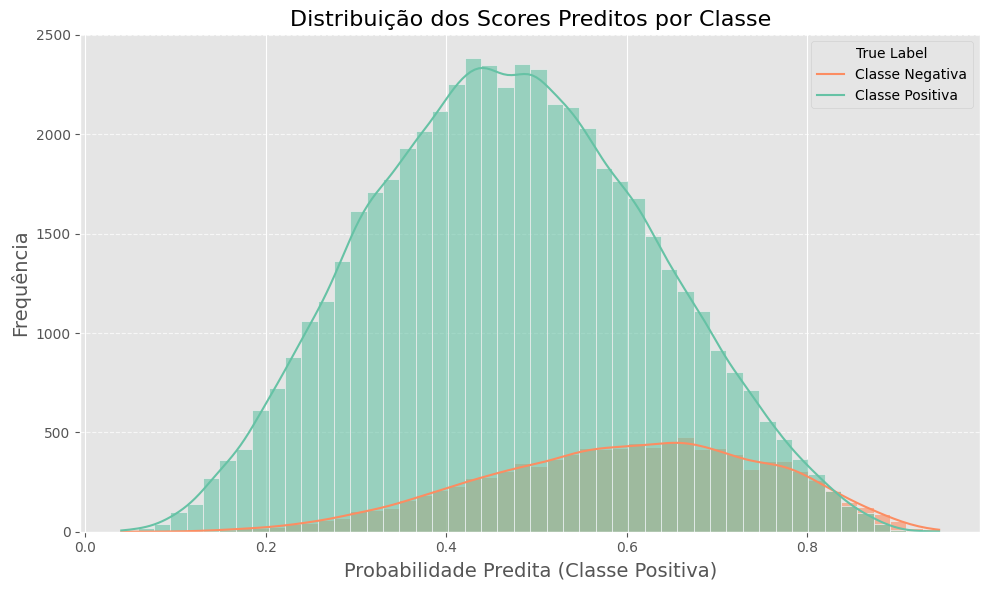

In [239]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Garantir que os dados de teste e as probabilidades preditas sejam arrays NumPy
# Supomos que y_test_np e y_pred_proba já estão definidos conforme descrito

# Criação de um DataFrame para facilitar a visualização
import pandas as pd

data = pd.DataFrame({
    'True Label': y_test_np,
    'Predicted Probability': y_pred_proba
})

# Plotando a distribuição dos scores preditos
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Predicted Probability', hue='True Label', kde=True, bins=50, palette='Set2', alpha=0.6)
plt.title('Distribuição dos Scores Preditos por Classe', fontsize=16)
plt.xlabel('Probabilidade Predita (Classe Positiva)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.legend(title='True Label', labels=['Classe Negativa', 'Classe Positiva'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Feature Importance

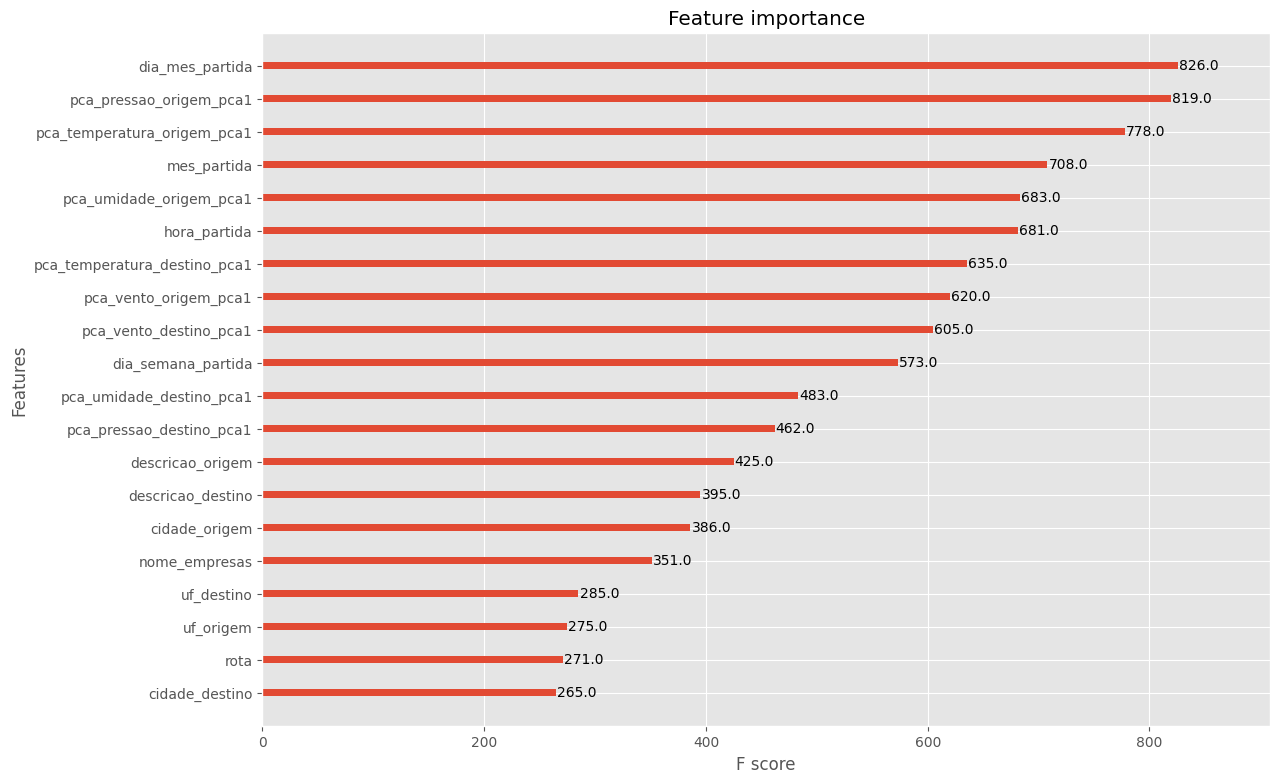

In [240]:
plt.rcParams['figure.figsize'] = [13, 9]
xgb.plot_importance(model_class, max_num_features=20)
plt.show()

#### Treeplot

In [241]:
# plot single tree
#fig, ax = plt.subplots(figsize=(100, 100))
#fig = plt.figure(figsize=(12, 6))
# plt.figure(figsize=(50, 50))
#plot_tree(model_class)
#plt.savefig('xgb_treeplot.jpg', dpi=1800)  
#plt.show()

### Matriz de Confusão

O gráfico de calor mostra as previsões do modelo em relação aos valores reais. Os valores na diagonal (7979 e 148171) representam as previsões corretas para as classes negativas (0) e positivas (1), respectivamente. Os outros dois valores (19805 e 18812) representam os erros do tipo I(falsos negativos) e tipo II(falsos positivos), respectivamente. A matriz sugere que o modelo é melhor em prever a classe majoritária (Pontual) do que a minoritária (Atraso), o que é comum em conjuntos de dados desbalanceados.

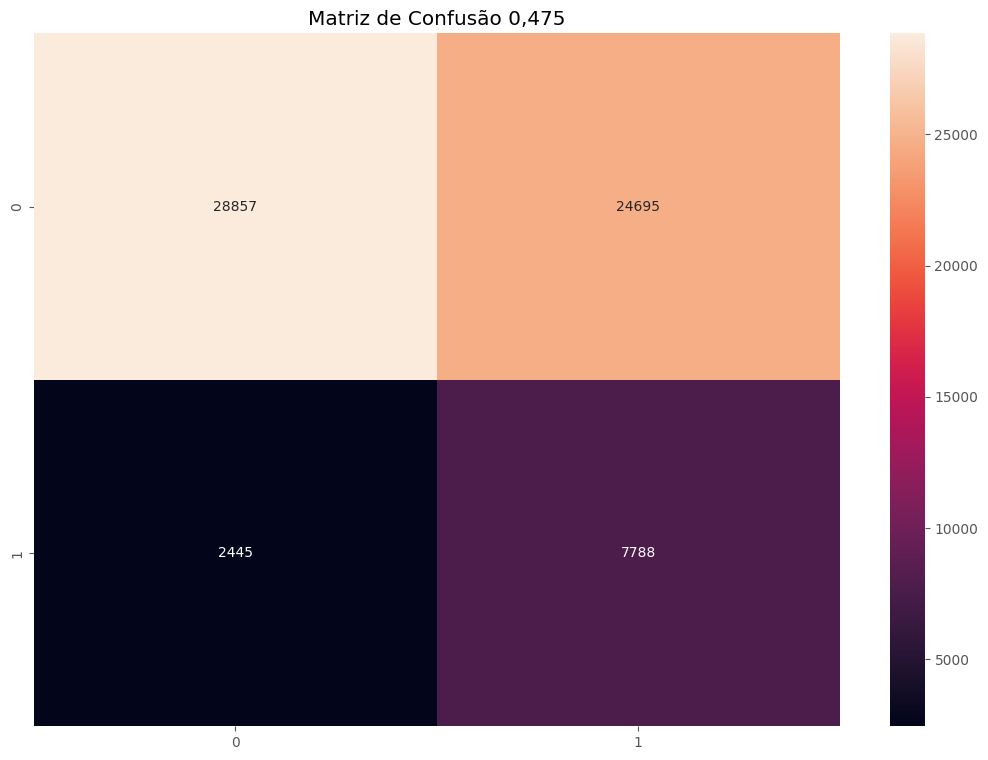

In [242]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de Confusão 0,475')
plt.show()

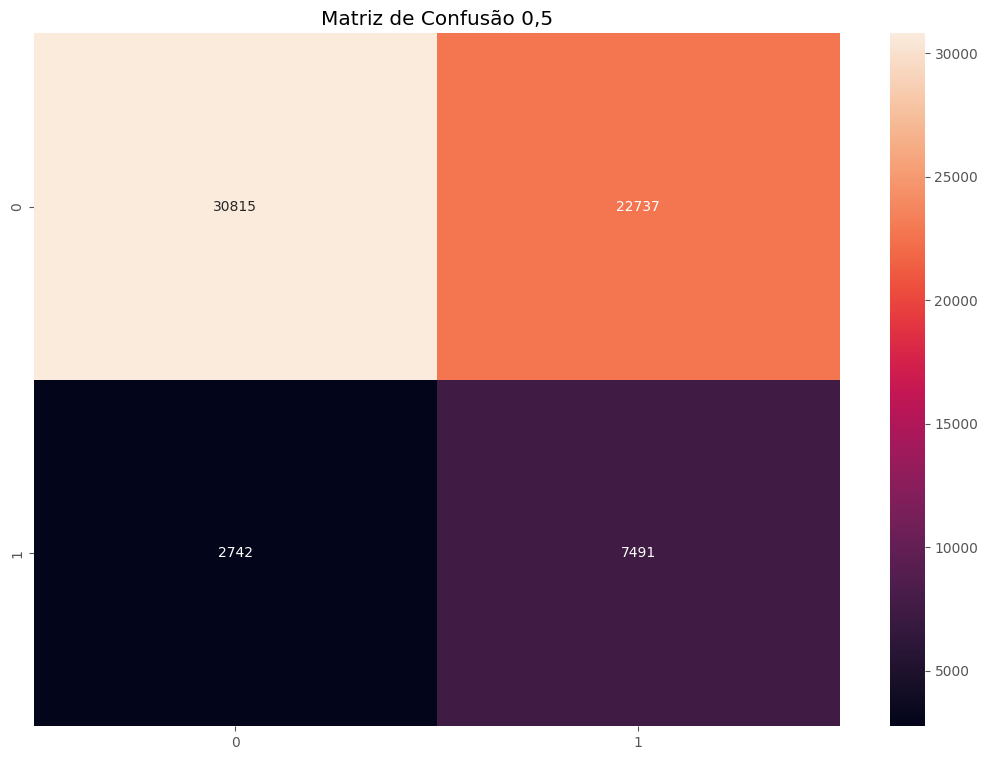

In [243]:
# Garantir que y_test e y_pred_proba sejam arrays NumPy
y_test_np = np.array(y_test)  # Converte y_test para NumPy se necessário
y_pred_proba = model_class.predict(dtest)  # Previsões no formato de probabilidades da classe positiva

# Prever as classes com base no limiar de 0.5
y_pred3 = (y_pred_proba >= 0.5).astype(int)

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de Confusão 0,5')
plt.show()

### Curva ROC

A relação entre a taxa de verdadeiro positivo e a taxa de falso positivo para diferentes limiares de classificação. A curva está suave e sobe gradualmente. No entanto, uma curva ROC ideal se aproximaria mais do canto superior esquerdo mais rápido. A consequência é que temos uma alta taxa de verdadeiro positivo e baixa taxa de falso positivo. Isso devido ao banco de dados desbalanceado. O resultado nos permit dizer que ainda há um potencial de melhoria no modelo

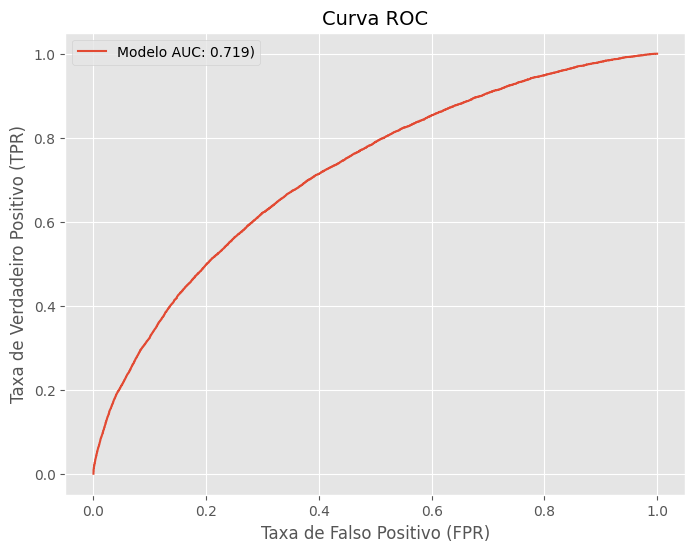

In [234]:
# Gerar previsões probabilísticas para a classe positiva
y_pred_proba_pos = model_class.predict(dtest)   # Probabilidades da classe positiva

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pos)

# Plot da Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Modelo AUC: {roc_auc_score(y_test_np, y_pred_proba):.3f})')
plt.title('Curva ROC', fontsize=14)
plt.xlabel('Taxa de Falso Positivo (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()




### Curva de Precisão-Recall

Este gráfico é útil em situações de classes desbalanceadas e foca na relação entre precisão (quão muitos dos classificados como positivos são realmente positivos) e recall (quão muitos dos positivos reais foram capturados pelo modelo). A curva começa com uma alta precisão, mas diminui à medida que o recall aumenta, isso pode ser um sinal de que pode estar acontecendo um trade-off, ou seja, visando ter mais ou manter performance.

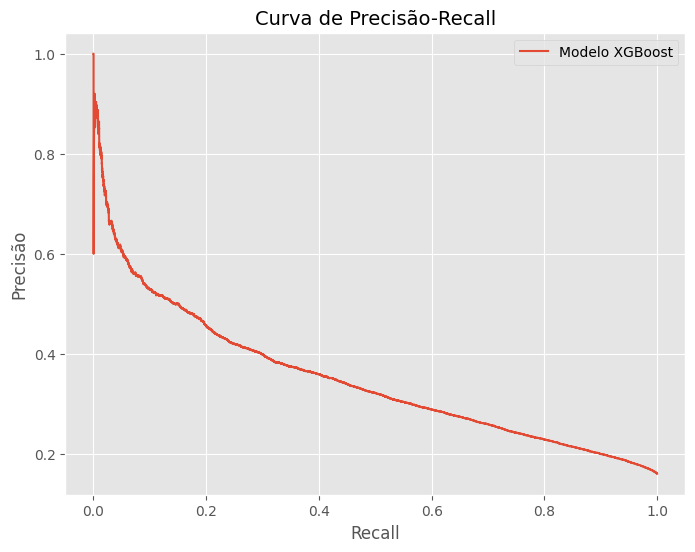

In [235]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Gerar previsões probabilísticas para a classe positiva
y_pred_proba_pos = model_class.predict(dtest)   # Probabilidades da classe positiva

# Curva de Precisão-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_pos)

# Plot da Curva de Precisão-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Modelo XGBoost')
plt.title('Curva de Precisão-Recall', fontsize=14)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precisão', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


### Calibration plot


Before Calibration
--- Uncalibrated ---
Log Loss: 0.6621
AUC: 0.7256
Brier Score: 0.2348
Overconfidence Error: 0.2598
Expected Calibration Error (ECE): 0.3290
Maximum Calibration Error (MCE): 0.4049


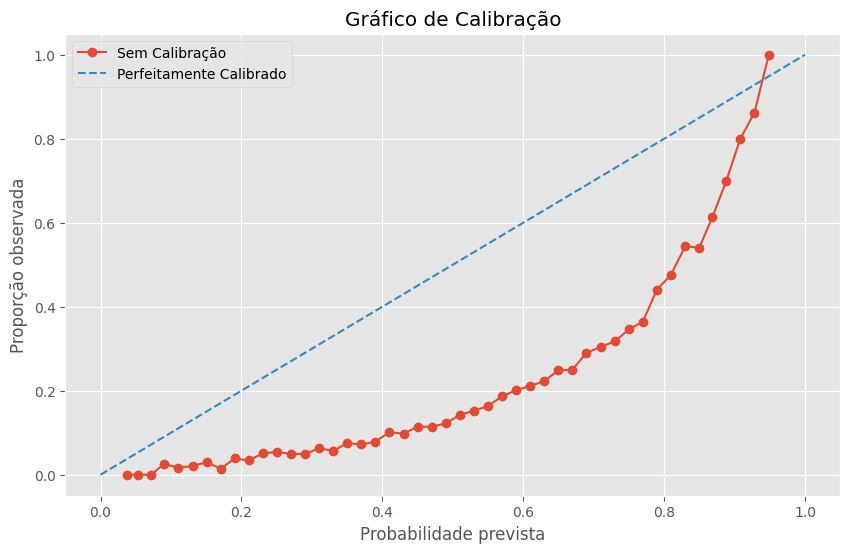

In [236]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss, make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import numpy as np

# Funções para métricas adicionais
def calculate_overconfidence_error(y_true, y_pred, bins=10):
    """Calcula o erro de overconfidence."""
    bin_edges = np.linspace(0, 1, bins + 1)
    bin_sums = np.zeros(bins)
    bin_counts = np.zeros(bins)

    for i in range(bins):
        bin_mask = (y_pred >= bin_edges[i]) & (y_pred < bin_edges[i + 1])
        bin_sums[i] = np.sum(y_pred[bin_mask]) - np.sum(y_true[bin_mask])
        bin_counts[i] = np.sum(bin_mask)

    overconfidence_error = np.sum(np.abs(bin_sums) / bin_counts) / bins
    return overconfidence_error

def calculate_ece_mce(y_true, y_pred, bins=10):
    """Calcula o Expected Calibration Error (ECE) e Maximum Calibration Error (MCE)."""
    bin_edges = np.linspace(0, 1, bins + 1)
    ece = 0
    mce = 0

    for i in range(bins):
        bin_mask = (y_pred >= bin_edges[i]) & (y_pred < bin_edges[i + 1])
        bin_true = y_true[bin_mask]
        bin_pred = y_pred[bin_mask]

        if len(bin_true) > 0:
            accuracy = np.mean(bin_true)
            avg_confidence = np.mean(bin_pred)
            bin_error = np.abs(accuracy - avg_confidence)

            ece += bin_error * len(bin_true)
            mce = max(mce, bin_error)

    ece /= len(y_true)
    return ece, mce

def evaluate_metrics(y_true, y_pred, title="Metrics"):
    """Calcula e exibe as métricas."""
    logloss = log_loss(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    brier = brier_score_loss(y_true, y_pred)
    overconfidence = calculate_overconfidence_error(y_true, y_pred)
    ece, mce = calculate_ece_mce(y_true, y_pred)

    print(f"--- {title} ---")
    print(f"Log Loss: {logloss:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Brier Score: {brier:.4f}")
    print(f"Overconfidence Error: {overconfidence:.4f}")
    print(f"Expected Calibration Error (ECE): {ece:.4f}")
    print(f"Maximum Calibration Error (MCE): {mce:.4f}")
# Prever probabilidades da classe positiva no conjunto de teste
y_pred_proba = model_class.predict(dtest_calib)  # Probabilidades da classe positiva

# Ajustar os parâmetros para XGBClassifier
classifier_params = best_params.copy()
classifier_params['n_estimators'] = num_boost_round  # Número de iterações de boosting

# Configuração do modelo XGBClassifier
model = XGBClassifier(**classifier_params)

# Treinamento do modelo inicial sem calibração
model.fit(X_train_calib, y_train_calib)
y_pred_test_uncalibrated = model.predict_proba(X_test)[:, 1]

# Avaliar métricas antes da calibração
print("\nBefore Calibration")
evaluate_metrics(y_test, y_pred_test_uncalibrated, title="Uncalibrated")

# Obter os valores para o gráfico de calibração antes e depois da calibração
prob_true_uncalibrated, prob_pred_uncalibrated = calibration_curve(y_test, y_pred_test_uncalibrated, n_bins=50, strategy='uniform')

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(prob_pred_uncalibrated, prob_true_uncalibrated, marker='o', label='Sem Calibração')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfeitamente Calibrado')
plt.xlabel('Probabilidade prevista')
plt.ylabel('Proporção observada')
plt.title('Gráfico de Calibração')
plt.legend()
plt.grid(True)
plt.show()

# Implementando Calibração

In [132]:
calibrated

CalibratedClassifierCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=4, random_state=13),
                       estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=0.9351496325903813,
                                               device='cuda',
                                               early_stopping_rounds=None,
                                               enable_categorical=True,
                                               eval_metric=['aucpr', 'auc'],
                                               feature_types=Non...
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.046502926159496596,
                                               max_bin=None,
                                               max_cat_threshold=32,
                                               max_cat_to_onehot=10,
                                               max_delta_step=8.969973915659033,
                                               max_depth=11, max_leaves=None,
                                               min_child_weight=7, missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=800, n_jobs=None,
                                               nthread=-1,
                                               num_parallel_tree=None, ...))

In [24]:
# Validação cruzada na calibração com RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=10, random_state=13)

# Calibração isotônica com validação cruzada
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=cv)

# Avaliar o modelo calibrado com cross-validation
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
scores = cross_val_score(calibrated, X_test_calib, y_test_calib, scoring=roc_auc_scorer, cv=cv, n_jobs=-1)

# Exibir resultados de validação cruzada
print(f"Mean ROC AUC (cross-validation): {np.mean(scores):.4f}")
print(f"Standard Deviation ROC AUC (cross-validation): {np.std(scores):.4f}")

# Ajustar o modelo calibrado para avaliação no conjunto de teste
calibrated.fit(X_test_calib, y_test_calib)

# Predições no conjunto de teste após calibração
y_pred_test_calibrated = calibrated.predict_proba(X_test)[:, 1]

# Avaliar métricas após calibração no conjunto de teste
print("\nAfter Calibration")
evaluate_metrics(y_test, y_pred_test_calibrated, title="Calibrated")


The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.


Mean ROC AUC (cross-validation): 0.7046
Standard Deviation ROC AUC (cross-validation): 0.0053

After Calibration
--- Calibrated ---
Log Loss: 0.4198
AUC: 0.7028
Brier Score: 0.1304
Overconfidence Error: nan
Expected Calibration Error (ECE): 0.0157
Maximum Calibration Error (MCE): 0.2850


invalid value encountered in divide


In [129]:
# Validação cruzada na calibração com RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=10, random_state=13)

# Calibração isotônica com validação cruzada
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=cv)

# Avaliar o modelo calibrado com cross-validation
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
scores = cross_val_score(calibrated, X_test_calib, y_test_calib, scoring=roc_auc_scorer, cv=cv, n_jobs=-1)

# Exibir resultados de validação cruzada
print(f"Mean ROC AUC (cross-validation): {np.mean(scores):.4f}")
print(f"Standard Deviation ROC AUC (cross-validation): {np.std(scores):.4f}")

# Ajustar o modelo calibrado para avaliação no conjunto de teste
calibrated.fit(X_test_calib, y_test_calib)

# Predições no conjunto de teste após calibração
y_pred_test_calibrated = calibrated.predict_proba(X_test)[:, 1]

# Avaliar métricas após calibração no conjunto de teste
print("\nAfter Calibration")
evaluate_metrics(y_test, y_pred_test_calibrated, title="Calibrated")


The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


Mean ROC AUC (cross-validation): 0.7034
Standard Deviation ROC AUC (cross-validation): 0.0070

After Calibration
--- Calibrated ---
Log Loss: 0.4172
AUC: 0.7131
Brier Score: 0.1297
Overconfidence Error: nan
Expected Calibration Error (ECE): 0.0155
Maximum Calibration Error (MCE): 0.3048


invalid value encountered in divide


In [ ]:
# Validação cruzada na calibração com RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=13)

# Calibração isotônica com validação cruzada
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=4)

# Avaliar o modelo calibrado com cross-validation
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
scores = cross_val_score(calibrated, X_test_calib, y_test_calib, scoring=roc_auc_scorer, cv=cv, n_jobs=-1)

# Exibir resultados de validação cruzada
print(f"Mean ROC AUC (cross-validation): {np.mean(scores):.4f}")
print(f"Standard Deviation ROC AUC (cross-validation): {np.std(scores):.4f}")

# Ajustar o modelo calibrado para avaliação no conjunto de teste
calibrated.fit(X_test_calib, y_test_calib)

# Predições no conjunto de teste após calibração
y_pred_test_calibrated = calibrated.predict_proba(X_test)[:, 1]

# Avaliar métricas após calibração no conjunto de teste
print("\nAfter Calibration")
evaluate_metrics(y_test, y_pred_test_calibrated, title="Calibrated")


In [137]:
scores

array([0.69912917, 0.70507508, 0.71337509, 0.6958807 , 0.69868182,
       0.69219356, 0.70160707, 0.71270611, 0.71581708, 0.70193567,
       0.70008985, 0.7026696 , 0.70420715, 0.6889511 , 0.70926342,
       0.7135742 , 0.693067  , 0.6935803 , 0.72213298, 0.7072745 ,
       0.70243878, 0.70924086, 0.69832797, 0.69792313, 0.70672616,
       0.70000333, 0.69941833, 0.70565706, 0.70895498, 0.69580898,
       0.70715487, 0.700533  , 0.69837832, 0.70723243, 0.70561036,
       0.70828019, 0.70146202, 0.70014856, 0.69848634, 0.7136247 ])

## Diagrama de caliabração

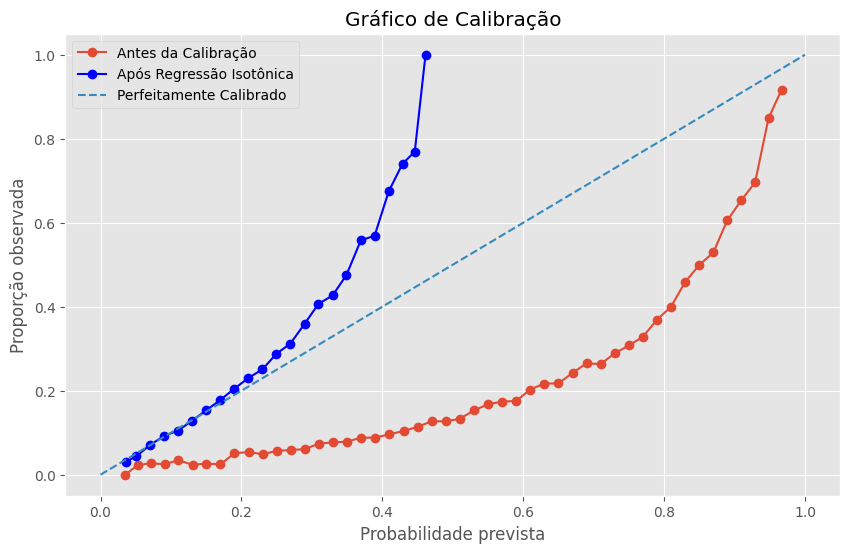

In [25]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Prever probabilidades da classe positiva no conjunto de teste
y_pred_proba = model_class.predict(dtest_calib)  # Probabilidades da classe positiva


# Obter os valores para o gráfico de calibração antes e depois da calibração
prob_true_uncalibrated, prob_pred_uncalibrated = calibration_curve(y_test, y_pred_test_uncalibrated, n_bins=50, strategy='uniform')
prob_true_calibrated, prob_pred_calibrated = calibration_curve(y_test, y_pred_test_calibrated, n_bins=50, strategy='uniform')

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(prob_pred_uncalibrated, prob_true_uncalibrated, marker='o', label='Antes da Calibração')
plt.plot(prob_pred_calibrated, prob_true_calibrated, marker='o', label='Após Regressão Isotônica', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfeitamente Calibrado')
plt.xlabel('Probabilidade prevista')
plt.ylabel('Proporção observada')
plt.title('Gráfico de Calibração')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Validação cruzada na calibração com RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=13)

# Calibração isotônica com validação cruzada
calibrated = CalibratedClassifierCV(model, method='isotonic', cv=4)

# Avaliar o modelo calibrado com cross-validation
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
scores = cross_val_score(calibrated, X_test_calib, y_test_calib, scoring=roc_auc_scorer, cv=cv, n_jobs=-1)

# Exibir resultados de validação cruzada
print(f"Mean ROC AUC (cross-validation): {np.mean(scores):.4f}")
print(f"Standard Deviation ROC AUC (cross-validation): {np.std(scores):.4f}")

# Ajustar o modelo calibrado para avaliação no conjunto de teste
calibrated.fit(X_test_calib, y_test_calib)

# Predições no conjunto de teste após calibração
y_pred_test_calibrated = calibrated.predict_proba(X_test)[:, 1]

# Avaliar métricas após calibração no conjunto de teste
print("\nAfter Calibration")
evaluate_metrics(y_test, y_pred_test_calibrated, title="Calibrated")


The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.


Mean ROC AUC (cross-validation): 0.7032
Standard Deviation ROC AUC (cross-validation): 0.0050

After Calibration
--- Calibrated ---
Log Loss: 0.4206
AUC: 0.7003
Brier Score: 0.1306
Overconfidence Error: nan
Expected Calibration Error (ECE): 0.0207
Maximum Calibration Error (MCE): 0.2080


invalid value encountered in divide


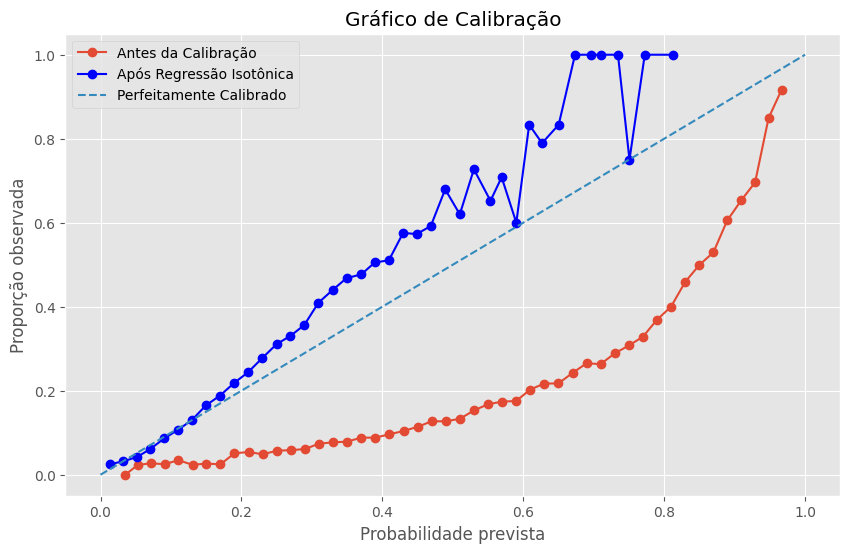

In [27]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Prever probabilidades da classe positiva no conjunto de teste
y_pred_proba = model_class.predict(dtest_calib)  # Probabilidades da classe positiva


# Obter os valores para o gráfico de calibração antes e depois da calibração
prob_true_uncalibrated, prob_pred_uncalibrated = calibration_curve(y_test, y_pred_test_uncalibrated, n_bins=50, strategy='uniform')
prob_true_calibrated, prob_pred_calibrated = calibration_curve(y_test, y_pred_test_calibrated, n_bins=50, strategy='uniform')

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(prob_pred_uncalibrated, prob_true_uncalibrated, marker='o', label='Antes da Calibração')
plt.plot(prob_pred_calibrated, prob_true_calibrated, marker='o', label='Após Regressão Isotônica', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfeitamente Calibrado')
plt.xlabel('Probabilidade prevista')
plt.ylabel('Proporção observada')
plt.title('Gráfico de Calibração')
plt.legend()
plt.grid(True)
plt.show()

## DDistribuição das probabiliade calibrado e nao calibrado

Tamanho de y_test: 98762
Tamanho de y_pred_test_uncalibrated_proba: 98762
Tamanho de y_pred_test_calibrated_proba: 98762


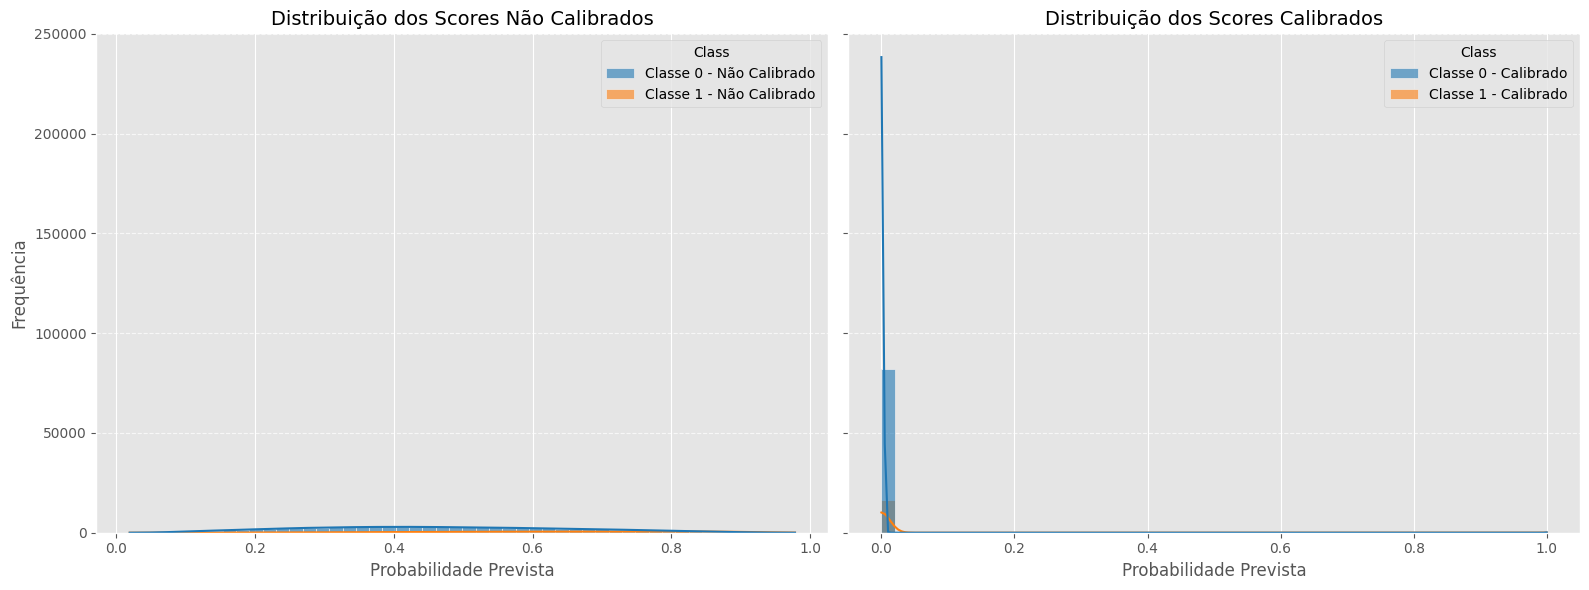

In [30]:
# Garantir que y_test e y_pred_proba sejam arrays NumPy
y_pred_test_uncalibrated_np = np.array(y_test)  # Converte y_test para NumPy se necessário
y_pred_test_uncalibrated_proba = model_class.predict(dtest)  # Previsões no formato de probabilidades da classe positiva

# Prever as classes com base no limiar de 0.5
y_pred_test_uncalibrated = (y_pred_test_uncalibrated_proba >= 0.5).astype(int)

# Garantir que y_test e y_pred_proba sejam arrays NumPy
y_pred_test_calibrated_np = np.array(y_test)  # Converte y_test para NumPy se necessário
y_pred_test_calibrated_proba = calibrated.predict(X_test)  # Previsões no formato de probabilidades da classe positiva

# Prever as classes com base no limiar de 0.5
y_pred_test_calibrated = (y_pred_test_calibrated_proba >= 0.5).astype(int)

# Ajustando as variáveis conforme o dataset fornecido

# Verificar os tamanhos das variáveis
print(f"Tamanho de y_test: {len(y_pred_test_uncalibrated_np)}")
print(f"Tamanho de y_pred_test_uncalibrated_proba: {len(y_pred_test_uncalibrated_proba)}")
print(f"Tamanho de y_pred_test_calibrated_proba: {len(y_pred_test_calibrated_proba)}")

# Garantir que os tamanhos sejam consistentes
if len(y_pred_test_uncalibrated_np) != len(y_pred_test_uncalibrated_proba):
    y_pred_test_uncalibrated_np = y_pred_test_uncalibrated_np[:len(y_pred_test_uncalibrated_proba)]

if len(y_pred_test_uncalibrated_np) != len(y_pred_test_calibrated_proba):
    y_pred_test_calibrated_proba = y_pred_test_calibrated_proba[:len(y_pred_test_uncalibrated_np)]

# Criar DataFrames para as distribuições
data_class_0_uncalibrated = pd.DataFrame({
    'Predicted Probability': y_pred_test_uncalibrated_proba[y_pred_test_uncalibrated_np == 0],
    'Class': 'Classe 0 - Não Calibrado'
})

data_class_1_uncalibrated = pd.DataFrame({
    'Predicted Probability': y_pred_test_uncalibrated_proba[y_pred_test_uncalibrated_np == 1],
    'Class': 'Classe 1 - Não Calibrado'
})

data_class_0_calibrated = pd.DataFrame({
    'Predicted Probability': y_pred_test_calibrated_proba[y_pred_test_uncalibrated_np == 0],
    'Class': 'Classe 0 - Calibrado'
})

data_class_1_calibrated = pd.DataFrame({
    'Predicted Probability': y_pred_test_calibrated_proba[y_pred_test_uncalibrated_np == 1],
    'Class': 'Classe 1 - Calibrado'
})

# Redefinir os índices para evitar conflitos
data_class_0_uncalibrated = data_class_0_uncalibrated.reset_index(drop=True)
data_class_1_uncalibrated = data_class_1_uncalibrated.reset_index(drop=True)
data_class_0_calibrated = data_class_0_calibrated.reset_index(drop=True)
data_class_1_calibrated = data_class_1_calibrated.reset_index(drop=True)

# Gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Gráfico para dados não calibrados
sns.histplot(
    data=pd.concat([data_class_0_uncalibrated, data_class_1_uncalibrated]).reset_index(drop=True),
    x='Predicted Probability',
    hue='Class',
    kde=True,
    bins=50,
    palette='tab10',
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title('Distribuição dos Scores Não Calibrados', fontsize=14)
axes[0].set_xlabel('Probabilidade Prevista', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico para dados calibrados
sns.histplot(
    data=pd.concat([data_class_0_calibrated, data_class_1_calibrated]).reset_index(drop=True),
    x='Predicted Probability',
    hue='Class',
    kde=True,
    bins=50,
    palette='tab10',
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_title('Distribuição dos Scores Calibrados', fontsize=14)
axes[1].set_xlabel('Probabilidade Prevista', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar layout
plt.tight_layout()
plt.show()

## Análise após calibração do modelo

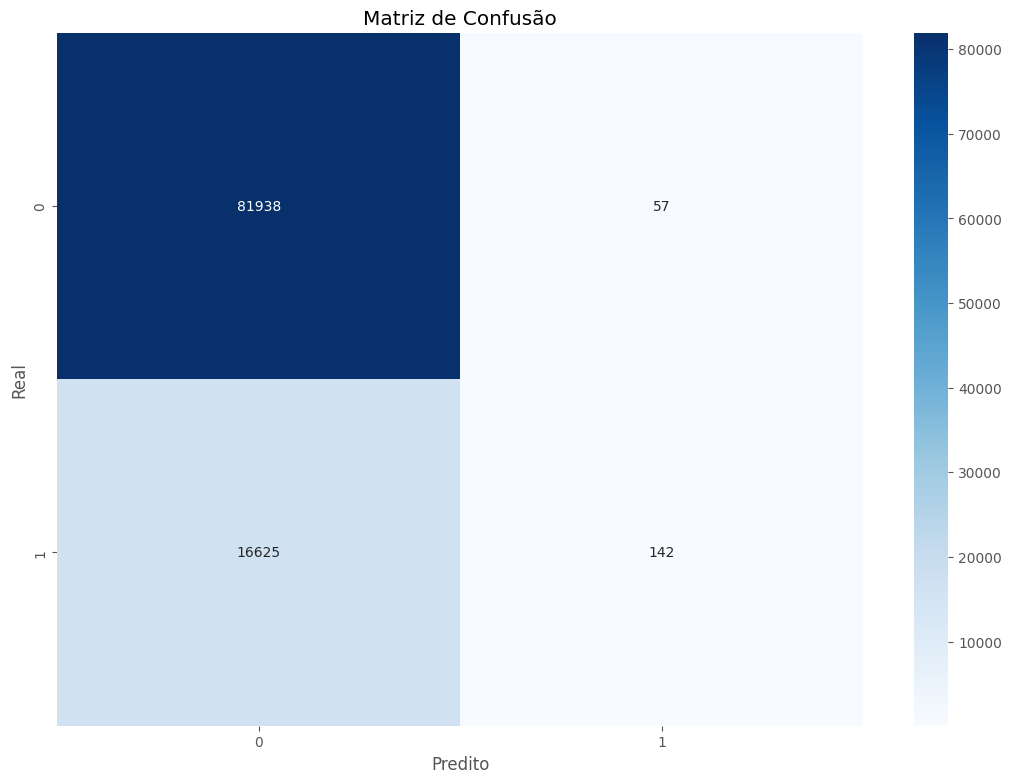

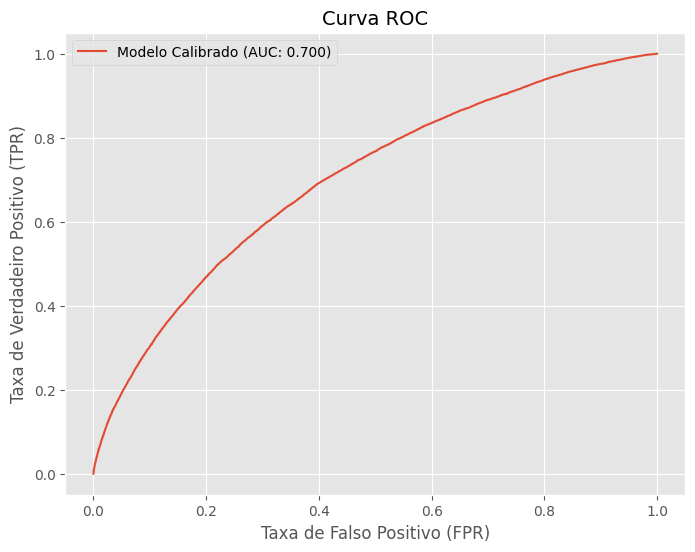

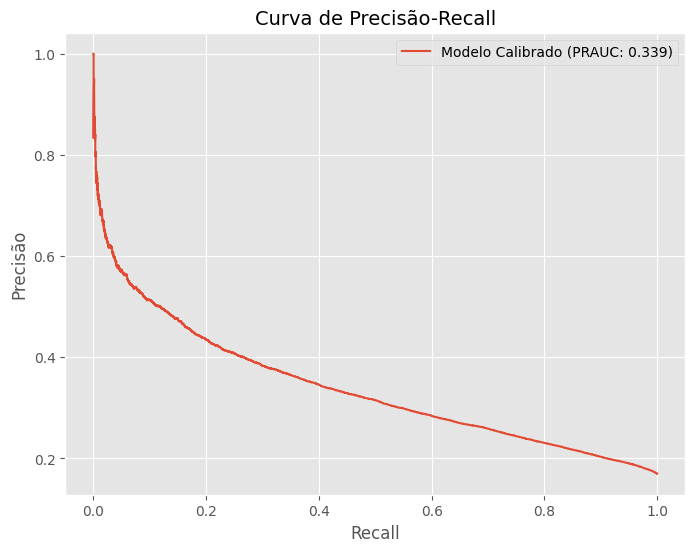

Accuracy: 0.831
Precision: 0.714
Recall: 0.008
F1-Score: 0.017
PRAUC: 0.339
AUC: 0.700
Gini Coefficient: 0.401
MCC: 0.065
Log Loss: 0.421
Brier Score: 0.131
Cohen's Kappa: 0.013
Balanced Accuracy: 0.504
Specificity: 0.999
False Positive Rate (FPR): 0.001
False Negative Rate (FNR): 0.992
Geometric Mean (G-Mean): 0.092


In [58]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score,
    f1_score, roc_auc_score, balanced_accuracy_score, average_precision_score,
    log_loss, brier_score_loss, cohen_kappa_score, matthews_corrcoef,
    roc_curve, precision_recall_curve
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Garantir que y_test e y_pred_proba sejam arrays NumPy
y_test_np = np.array(y_test)  # Converte y_test para NumPy se necessário

# Gerar previsões probabilísticas para a classe positiva após calibração
y_pred_proba = calibrated.predict_proba(X_test)[:, 1]  # Previsões calibradas (probabilidades)

# Prever as classes com base no limiar de 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

# Matriz de Confusão
cm = confusion_matrix(y_test_np, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Modelo Calibrado (AUC: {roc_auc_score(y_test_np, y_pred_proba):.3f})')
plt.title('Curva ROC', fontsize=14)
plt.xlabel('Taxa de Falso Positivo (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Curva de Precisão-Recall
precision, recall, _ = precision_recall_curve(y_test_np, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Modelo Calibrado (PRAUC: {average_precision_score(y_test_np, y_pred_proba):.3f})')
plt.title('Curva de Precisão-Recall', fontsize=14)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precisão', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Cálculos de Métricas
TN, FP, FN, TP = cm.ravel()
accuracy = accuracy_score(y_test_np, y_pred)
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = sensitivity
f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
balanced_acc = balanced_accuracy_score(y_test_np, y_pred)
fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
fnr = FN / (FN + TP) if (FN + TP) > 0 else 0

# Métricas baseadas em probabilidades
prauc = average_precision_score(y_test_np, y_pred_proba)
auc = roc_auc_score(y_test_np, y_pred_proba)
gini = 2 * auc - 1
mcc = matthews_corrcoef(y_test_np, y_pred)
log_loss_value = log_loss(y_test_np, y_pred_proba)
brier_score = brier_score_loss(y_test_np, y_pred_proba)
kappa = cohen_kappa_score(y_test_np, y_pred)

# Geometric Mean (G-Mean)
g_mean = np.sqrt(sensitivity * specificity)

# Exibir as métricas
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-Score: {f1:.3f}')
print(f'PRAUC: {prauc:.3f}')
print(f'AUC: {auc:.3f}')
print(f'Gini Coefficient: {gini:.3f}')
print(f'MCC: {mcc:.3f}')
print(f'Log Loss: {log_loss_value:.3f}')
print(f'Brier Score: {brier_score:.3f}')
print(f'Cohen\'s Kappa: {kappa:.3f}')
print(f'Balanced Accuracy: {balanced_acc:.3f}')
print(f'Specificity: {specificity:.3f}')
print(f'False Positive Rate (FPR): {fpr:.3f}')
print(f'False Negative Rate (FNR): {fnr:.3f}')
print(f'Geometric Mean (G-Mean): {g_mean:.3f}')

### Shap
(análise do modelo e não do modelo calibrado)

O Shap nos permite compreender o peso de cada variavel para o modelo

In [420]:
# Ajustar os parâmetros para XGBClassifier
classifier_params = best_params.copy()
classifier_params['n_estimators'] = num_boost_round  # Número de iterações de boosting

# Configuração do modelo XGBClassifier
model = XGBClassifier(**classifier_params)

# Treinamento do modelo inicial sem calibração
model.fit(X_train_calib, y_train_calib)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6069956944909465,
              colsample_bynode=0.9039035992169655,
              colsample_bytree=0.483288589450143, device='cuda',
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=['aucpr', 'auc'], feature_types=None,
              gamma=6.398645732347779, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.24912951565642039,
              max_bin=160, max_cat_threshold=54, max_cat_to_onehot=22,
              max_delta_step=5.167713451960182, max_depth=10, max_leaves=120,
              min_child_weight=19, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=700, n_jobs=None,
              num_parallel_tree=1, random_state=None, ...)

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
shap.plots.bar(shap_values, max_display=18)

In [ ]:
pred = model.predict(X_test_calib, output_margin=True)

explainer = shap.TreeExplainer(model)
explanation = explainer(dtest)

shap_values = explanation.values

shap.plots.beeswarm(explanation)

# make sure the SHAP values add up to marginal predictions
#np.abs(shap_values.sum(axis=1) + explanation.base_values - y_test_calib).max()

#dtest_calib.feature_names

In [ ]:
pred = model.predict(X_test, output_margin=True)

explainer = shap.TreeExplainer(model)
explanation = explainer(X_test)

shap_values = explanation.values

shap.plots.beeswarm(explanation)

# make sure the SHAP values add up to marginal predictions
np.abs(shap_values.sum(axis=1) + explanation.base_values - y_test).max()

# Salvando o Modelo

In [145]:
# Salvar o modelo
save_pickle(model_class, 'modelo/modelo_xgboost_no_smote2.pkl')

In [ ]:
calibrated

In [ ]:
# Salvar o modelo
save_pickle(calibrated, 'modelo/modelo_xgboost_no_smote.pkl')

# Load no modelo

In [ ]:
# Carregar o modelo
modelo_carregado = load_pickle('modelo/modelo_pkl/modelo_xgboost_no_smote.pkl')

# Parametros modelo

In [ ]:
best_hyperparams2 = {'colsample_bytree': 0.8769272880522871,
 'device': 'cuda',
 'enable_categorical': True,
 'gamma': 7.404660248775922,
 'learning_rate': 0.08522768570219735,
 'max_cat_threshold': 19,
 'max_cat_to_onehot': 36,
 'max_delta_step': 10.706743260930955,
 'max_depth': 31,
 'min_child_weight': 16,
 'n_estimators': 590,
 'objective': 'binary:logistic',
 'reg_alpha': 40,
 'reg_lambda': 10.428273416870665,
 'sampling_method': 'gradient_based',
 'scale_pos_weight': 9.195510530365235,
 'seed': 42,
 'subsample': 0.5100141123497389,
 'tree_method': 'hist',
 'validate_parameters': True}

Accuracy: 0.641
Precision: 0.282
Recall: 0.723
F1-Score: 0.406
PRAUC: 0.404
AUC: 0.740
Gini Coefficient: 0.481
MCC: 0.263
Log Loss: 0.666
Brier Score: 0.235
Cohen's Kappa: 0.214
Balanced Accuracy: 0.673
Specificity: 0.624
False Positive Rate (FPR): 0.376
False Negative Rate (FNR): 0.277
Geometric Mean (G-Mean): 0.672

In [ ]:
{'max_depth': 8, 
 'gamma': 19.86634192246211, 
 'reg_alpha': 61, 
 'reg_lambda': 16.14199998988761, 
 'min_child_weight': 29, 
 'colsample_bytree': 0.8941673318099947, 
 'colsample_bylevel': 0.618276135794346, 
 'colsample_bynode': 0.8944610428107355, 
 'n_estimators': 1070, 
 'learning_rate': 0.29944767839091824, 
 'max_delta_step': 3.953498667674032, 
 'subsample': 0.6617997711601022, 
 'sampling_method': 'gradient_based', 
 'tree_method': 'hist', 
 'device': 'cuda', 
 'enable_categorical': True, 
 'scale_pos_weight': 4.940437019962464, 
 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'),
 'objective': 'binary:logistic', 
 'seed': 27, 
 'max_cat_to_onehot': 44, 
 'max_cat_threshold': 26, 
 'max_leaves': 152, 
 'validate_parameters': True, 
 'max_bin': 288, 
 'updater': 'grow_gpu_hist'}

Média AUCPR:0.3720237181281588
Média AUC:0.7250880722396829
Média LogLoss:0.6113767763452749


{'max_depth': 10, 
 'gamma': 6.398645732347779, 
 'reg_alpha': 181, 
 'reg_lambda': 18.712554230220295, 
 'min_child_weight': 19, 
 'colsample_bytree': 0.483288589450143, 
 'colsample_bylevel': 0.6069956944909465, 
 'colsample_bynode': 0.9039035992169655, 
 'n_estimators': 950, 
 'learning_rate': 0.24912951565642039, 
 'max_delta_step': 5.167713451960182, 
 'subsample': 0.48785821597543133, 
 'sampling_method': 'gradient_based', 
 'tree_method': 'hist', 
 'device': 'cuda', 
 'enable_categorical': True, 
 'scale_pos_weight': 5.583902695830374, 
 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'),
 'objective': 'binary:logistic', 
 'seed': 42, 
 'max_cat_to_onehot': 22, 
 'max_cat_threshold': 54, 
 'max_leaves': 120, 
 'validate_parameters': True, 
 'max_bin': 160, 
 'updater': 'grow_gpu_hist'}

Média AUCPR:0.37554266323496394
Média AUC:0.7268139074016899
Média LogLoss:0.6428925203729194

{'max_depth': 31, 
 'gamma': 1.481348560545965, 
 'reg_alpha': 99, 
 'reg_lambda': 9.346815615820415, 
 'min_child_weight': 14, 
 'colsample_bytree': 0.670525697514649, 
 'colsample_bylevel': 0.4866608001760379, 
 'colsample_bynode': 0.34965927616632764, 
 'learning_rate': 0.1820751133215484, 
 'max_delta_step': 6.361669916571317, 
 'subsample': 0.5350367142191607, 
 'sampling_method': 'gradient_based', 
 'tree_method': 'hist',
 'device': 'cuda',
 'enable_categorical': True,
 'scale_pos_weight': 7.644647221786009,
 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'),
 'objective': 'binary:logistic',
 'seed': 42,
 'max_cat_to_onehot': 15,
 'max_cat_threshold': 15, 
 'max_leaves': 232, 
 'validate_parameters': True,
 'updater': 'grow_gpu_hist'}

{'max_depth': 10, 
 'gamma': 10.324829293518372, 
 'reg_alpha': 17,
 'reg_lambda': 2.390038970608768,
 'min_child_weight': 13, 
 'colsample_bytree': 0.7996581279169486,
 'colsample_bylevel': 0.6884221459188411,
 'colsample_bynode': 0.7668035196433063,
 'n_estimators': 890,
 'learning_rate': 0.11614595627067434,
 'max_delta_step': 8.004233953931234,
 'subsample': 0.719957031414767,
 'sampling_method': 'gradient_based',
 'tree_method': 'hist', 
 'device': 'cuda',
 'enable_categorical': True, 
 'scale_pos_weight': 5.79110275280983, 
 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'), 
 'objective': 'binary:logistic', 
 'seed': 50, 
 'max_cat_to_onehot': 43, 
 'max_cat_threshold': 12,
 'max_leaves': 236, 
 'validate_parameters': True, 
 'max_bin': 256, 
 'updater': 'grow_gpu_hist'}

Média AUCPR: 0.3998891601554856
Média AUC: 0.7427400645947804
Média LogLoss: 0.622798479593181


{'max_depth': 22, 
 'gamma': 4.219619041842354,
 'reg_alpha': 4,
 'reg_lambda': 11.504650432544093,
 'min_child_weight': 26,
 'colsample_bytree': 0.5538988290418478,
 'colsample_bylevel': 0.8973834241115122,
 'colsample_bynode': 0.5764182784086208, 
 'n_estimators': 460,
 'learning_rate': 0.11744790646382436, 
 'max_delta_step': 14.891698013900344, 
 'subsample': 0.9264316824201435, 
 'sampling_method': 'gradient_based',
 'tree_method': 'hist', 
 'device': 'cuda', 
 'enable_categorical': True, 
 'scale_pos_weight': 9.940131573496615, 
 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'),
 'objective': 'binary:logistic', 
 'seed': 50,
 'max_cat_to_onehot': 48,
 'max_cat_threshold': 19,
 'max_leaves': 252, 
 'validate_parameters': True,
 'max_bin': 224,
 'updater': 'grow_gpu_hist'}

Média AUCPR: 0.39800394593734106
Média AUC: 0.7392885177001738
Média LogLoss: 0.7177972058271368

{'max_depth': 10, 
 'gamma': 6.398645732347779, 
 'reg_alpha': 181, 
 'reg_lambda': 18.712554230220295, 
 'min_child_weight': 19, 
 'colsample_bytree': 0.483288589450143, 
 'colsample_bylevel': 0.6069956944909465, 
 'colsample_bynode': 0.9039035992169655, 
 'n_estimators': 950, 
 'learning_rate': 0.24912951565642039, 
 'max_delta_step': 5.167713451960182, 
 'subsample': 0.48785821597543133, 
 'sampling_method': 'gradient_based', 
 'tree_method': 'hist', 
 'device': 'cuda', 
 'enable_categorical': True, 
 'scale_pos_weight': 5.583902695830374, 
 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'),
 'objective': 'binary:logistic', 
 'seed': 42, 
 'max_cat_to_onehot': 22, 
 'max_cat_threshold': 54, 
 'max_leaves': 120, 
 'validate_parameters': True, 
 'max_bin': 160, 
 'updater': 'grow_gpu_hist'}

Média AUCPR: 0.37554266323496394
Média AUC: 0.7268139074016899
Média LogLoss: 0.6428925203729194


{'max_depth': 6, 
 'gamma': 17.16763720563544, 
 'reg_alpha': 33, 
 'reg_lambda': 11.63671684061766, 
 'min_child_weight': 19, 
 'colsample_bytree': 0.8360938838164248, 
 'colsample_bylevel': 0.6990683576350217, 
 'colsample_bynode': 0.9042493865649595, 
 'n_estimators': 1150, 
 'learning_rate': 0.20980517450587138, 
 'max_delta_step': 2.9182362300640934, 
 'subsample': 0.4802016143811064, 
 'sampling_method': 'gradient_based', 
 'tree_method': 'hist', 
 'device': 'cuda', 
 'enable_categorical': True, 
 'scale_pos_weight': 6.5669450813417765, 
 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'),
 'objective': 'binary:logistic', 
 'seed': 27, 
 'max_cat_to_onehot': 46, 
 'max_cat_threshold': 41, 
 'max_leaves': 144, 
 'validate_parameters': True, 
 'max_bin': 256, 
 'updater': 'grow_gpu_hist'}

Média AUCPR: 0.3829114458492754
Média AUC: 0.7331733877940061
Média LogLoss: 0.6816001521365342

{'max_depth': 8, 
 'gamma': 19.86634192246211, 
 'reg_alpha': 61, 
 'reg_lambda': 16.14199998988761, 
 'min_child_weight': 29, 
 'colsample_bytree': 0.8941673318099947, 
 'colsample_bylevel': 0.618276135794346, 
 'colsample_bynode': 0.8944610428107355, 
 'n_estimators': 1070, 
 'learning_rate': 0.29944767839091824, 
 'max_delta_step': 3.953498667674032, 
 'subsample': 0.6617997711601022, 
 'sampling_method': 'gradient_based', 
 'tree_method': 'hist', 
 'device': 'cuda', 
 'enable_categorical': True, 
 'scale_pos_weight': 4.940437019962464, 
 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'),
 'objective': 'binary:logistic', 
 'seed': 27, 
 'max_cat_to_onehot': 44, 
 'max_cat_threshold': 26, 
 'max_leaves': 152, 
 'validate_parameters': True, 
 'max_bin': 288, 
 'updater': 'grow_gpu_hist'}

Média AUCPR: 0.3720237181281588
Média AUC: 0.7250880722396829
Média LogLoss: 0.6113767763452749


{'max_depth': 30, 
 'gamma': 4.598315802413257, 
 'reg_alpha': 164, 
 'reg_lambda': 16.970877995237963, 
 'min_child_weight': 19, 
 'colsample_bytree': 0.3692785131777304, 
 'colsample_bylevel': 0.8737676146381167, 
 'colsample_bynode': 0.9859226400534717, 
 'n_estimators': 130, 
 'learning_rate': 0.24682249307544957, 
 'max_delta_step': 3.973804512236775, 
 'subsample': 0.8632840598703412, 
 'sampling_method': 'gradient_based', 
 'tree_method': 'hist', 
 'device': 'cuda', 
 'enable_categorical': True, 
 'scale_pos_weight': 4.418861291059416, 
 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'),
 'objective': 'binary:logistic', 
 'seed': 42, 
 'max_cat_to_onehot': 19, 
 'max_cat_threshold': 23, 
 'max_leaves': 68, 
 'validate_parameters': True, 
 'max_bin': 160, 
 'updater': 'grow_gpu_hist'}

Média AUCPR: 0.36885315386272655
Média AUC: 0.7231930428253468
Média LogLoss: 0.5640884657900302

{'colsample_bylevel': 0.8951321154547697,
 'colsample_bynode': 0.9930559780116305,
 'colsample_bytree': 0.3903202428280351,
 'device': 'cuda',
 'enable_categorical': True,
 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'),
 'gamma': 3.3370251209956723,
 'learning_rate': 0.2073820599357662,
 'max_bin': 288,
 'max_cat_threshold': 29,
 'max_cat_to_onehot': 15,
 'max_delta_step': 14.403350369296696,
 'max_depth': 34,
 'max_leaves': 40,
 'min_child_weight': 16,
 'n_estimators': 160,
 'objective': 'binary:logistic',
 'reg_alpha': 148,
 'reg_lambda': 16.335265845125733,
 'sampling_method': 'gradient_based',
 'scale_pos_weight': 4.078217285126653,
 'seed': 42,
 'subsample': 0.9291556554821524,
 'tree_method': 'hist',
 'updater': 'grow_gpu_hist',
 'validate_parameters': True}

Média AUCPR: Não informado
Média AUC: Não informado
Média LogLoss: Não informado

{'max_depth': 24, 
 'gamma': 17.42962240313381, 
 'reg_alpha': 20, 
 'reg_lambda': 10.076398834448174, 
 'min_child_weight': 22, 
 'colsample_bytree': 0.7101684658552634, 
 'colsample_bylevel': 0.7832015997870787, 
 'colsample_bynode': 0.9221332633079607, 
 'n_estimators': 990, 
 'learning_rate': 0.024876709338423966, 
 'max_delta_step': 0.9152724060713564, 
 'subsample': 0.9313138234051968, 
 'sampling_method': 'gradient_based', 
 'tree_method': 'hist', 
 'device': 'cuda', 
 'enable_categorical': True, 
 'scale_pos_weight': 4.052002264106122, 
 'eval_metric': ('aucpr', 'auc', 'logloss', 'error'),
 'objective': 'binary:logistic', 
 'seed': 7, 
 'max_cat_to_onehot': 70, 
 'max_cat_threshold': 12, 
 'max_leaves': 76, 
 'validate_parameters': True, 
 'max_bin': 32, 
 'updater': 'grow_gpu_hist'}

Média AUCPR: 0.3899934369326581
Média AUC: 0.7356109665420674
Média LogLoss: 0.553446304926444